# Summary

<p>
This project explores probability distributions. The project does not
aims to explain such distributions in exhaustive manners, but sets a focus
Python coding, experimenting with random data, visualization.
Throughout examples are showing use cases.
</p> 

<p>    
The project here covers topics like:
</p> 

<p>
<ul>
  <li>Uniform distribution/li>
  <li>Probability density functions</li>
  <li>Cumulative distribution functions</li>
  <li>Simple Monte Carlo simulation</li>
  <li>Normal distributions</li>
  <li>Kurtosis</li>
  <li>Percent point functions/li>
  <li>Poisson distribution</li>
  <li>Frequency tables</li>
  <li>Central limit theorem (CLT)</li>
  <li>Law of large numbers</li>
  <li>Sampling distribution</li>  
</ul>
</p> 

## Install packages

In [345]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import collections
import statistics
import scipy.stats as stats
import itertools
import random as rd

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import neighbors, datasets, preprocessing
from sklearn.metrics import mean_absolute_error

In [346]:
# This a text dictionary for matplotlib plots
fontdict_1={'size':'x-large', 
          'color':'blueviolet', 
          'weight':'bold',
          'family':'arial'}

sns.set_style('darkgrid')



# print(random, type(random))

### Uniform distribution
<p>
Every outcome is as likely as the other.
</p> 

<p>
Python offers a lot of ways to generate random data for special distributions, aggregate data, or visualize data.
Some packages used here include scipy, pandas, matplotlib, seaborn etc.
</p> 

In [347]:
uni_1 = stats.uniform.rvs(size=10000, loc=5, scale=45)
uni_2= stats.uniform.rvs(size=1000000, loc=5, scale=45)
print(uni_1.shape)
print(uni_1[:20])

(10000,)
[41.24083718 24.00068202 26.75005085 19.54133788 46.56451454 18.82054049
 44.23559535 45.90714993 19.28189615 33.85283566 44.71568911 37.80701767
 39.2836849  10.14125703 48.97268409 13.97506072 15.69453663  9.26891603
 11.0317792  10.07406119]


In [348]:
stats.find_repeats(uni_1)
# All values are unique and do not repeat

RepeatedResults(values=array([], dtype=float64), counts=array([], dtype=int64))

In [349]:
stats.describe(uni_1)

DescribeResult(nobs=10000, minmax=(5.000571430453785, 49.99314403947116), mean=27.441197290716698, variance=171.96259134600018, skewness=-0.004515322074304297, kurtosis=-1.2147333560164104)

In [350]:
stats.describe(uni_2)

DescribeResult(nobs=1000000, minmax=(5.000065946548717, 49.99997614377793), mean=27.491204925649285, variance=168.55213497145283, skewness=0.0016766807933139337, kurtosis=-1.1975886730368352)

In [351]:
uni_1_pd = pd.Series(uni_1)
uni_2_pd = pd.Series(uni_2)


In [352]:
uni_1_pd.agg(['mean', 'median', 'std', 'min', 'max', 'skew', 'kurt'])

mean      27.441197
median    27.436164
std       13.113451
min        5.000571
max       49.993144
skew      -0.004516
kurt      -1.214741
dtype: float64

In [353]:
uni_2_pd.agg(['mean', 'median', 'std', 'min', 'max', 'skew', 'kurt'])

mean      27.491205
median    27.463088
std       12.982763
min        5.000066
max       49.999976
skew       0.001677
kurt      -1.197589
dtype: float64

An alternative for generating uniform random numbers is the randint function family of the random module.

In [354]:
p = []
for i in range(10001):
    g = rd.randint(1, 800)
    p.append(g)

In [355]:
print(len(p))
print(p[:10])

10001
[80, 259, 775, 527, 65, 645, 436, 14, 227, 712]


In [356]:
battery_data_df = pd.DataFrame(p, columns=['Driving_distance_km'])

battery_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Driving_distance_km  10001 non-null  int64
dtypes: int64(1)
memory usage: 78.3 KB


In [357]:
battery_data_df.head()

,Driving_distance_km
0,80
1,259
2,775
3,527
4,65


In [358]:
battery_data_df.describe()

,Driving_distance_km
count,10001.000000
mean,400.203380
std,229.544946
min,1.000000
25%,203.000000
50%,404.000000
75%,598.000000
max,800.000000


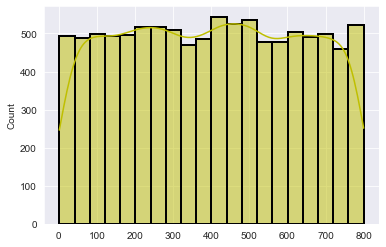

In [359]:
sns.histplot(p, kde=True, color='y', edgecolor='black', linewidth=2, fill=True, bins=20)
plt.show()

### Uniform distribution - probability density function

In [360]:
uni_1_pd_min = uni_1_pd.min()
uni_1_pd_max = uni_1_pd.max()

uni_2_pd_min = uni_2_pd.min()
uni_2_pd_max = uni_2_pd.max()

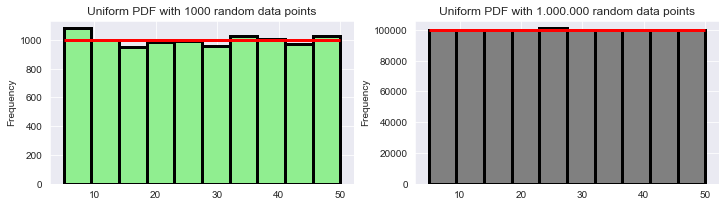

In [361]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,3))

uni_1_pd.plot(kind='hist', ax=ax1, color="lightgreen", edgecolor="black", linewidth=3,
              title='Uniform PDF with 1000 random data points')
ax1.hlines(1000, xmin=uni_1_pd_min, xmax=uni_1_pd_max, linewidth=3, color="red", label='PDF')

uni_2_pd.plot(kind='hist', ax=ax2, color="gray", edgecolor="black", linewidth=3,
              title='Uniform PDF with 1.000.000 random data points')
ax2.hlines(100000, xmin=uni_2_pd_min, xmax=uni_2_pd_max, linewidth=3, color="red", label='PDF')

plt.show()

In [362]:
uni1_rel = stats.relfreq(uni_1, 20)
uni2_rel = stats.relfreq(uni_2, 20)

uni1_rel

RelfreqResult(frequency=array([0.0268, 0.0587, 0.0525, 0.0532, 0.0532, 0.0483, 0.0529, 0.0511,
       0.0506, 0.0535, 0.0499, 0.0509, 0.0525, 0.0572, 0.053 , 0.0509,
       0.0499, 0.0534, 0.0551, 0.0264]), lowerlimit=3.8165563617954334, binsize=2.3680301373167043, extrapoints=0)

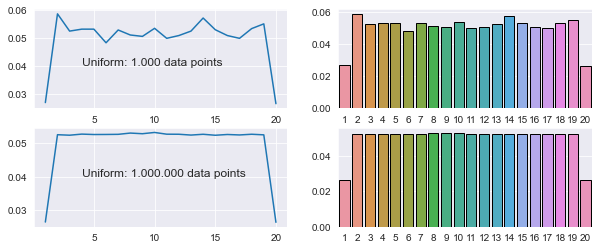

In [363]:
fig = plt.figure(figsize=(10,4), edgecolor='g')

ax1 = fig.add_subplot(221)
sns.lineplot(x=np.arange(1,21,1), y=uni1_rel.frequency, ax=ax1)
ax1.annotate('Uniform: 1.000 data points', (4, 0.04), fontsize=12)

ax2 = fig.add_subplot(222)
sns.barplot(x=np.arange(1,21,1), y=uni1_rel.frequency, ax=ax2, edgecolor='black')

ax3 = fig.add_subplot(223)
sns.lineplot(x=np.arange(1,21,1), y=uni2_rel.frequency, ax=ax3)
ax3.annotate('Uniform: 1.000.000 data points', (4, 0.04), fontsize=12)


ax4 = fig.add_subplot(224)
sns.barplot(x=np.arange(1,21,1), y=uni2_rel.frequency, ax=ax4, edgecolor='black')

plt.show()

#### Cumulative probability distribution of the uniform distribution

In [364]:
uni1_sort = np.sort(uni_1)
uni2_sort = np.sort(uni_2)

print(len(uni1_sort))
print(uni1_sort[:10])

10000
[5.00057143 5.0013984  5.01127968 5.01949683 5.02354034 5.02720224
 5.02894608 5.0378735  5.04314723 5.04418339]


In [365]:
uni1_sort_x = uni1_sort
uni1_sort_len = len(uni1_sort)

uni2_sort_x = uni2_sort
uni2_sort_len = len(uni2_sort)

uni1_sort_y_1 = np.arange(uni1_sort_len)
print(uni1_sort_y_1[:20]) 

uni1_sort_y_2 = np.arange(uni1_sort_len) / uni1_sort_len
print(uni1_sort_y_2[:20]) 

uni2_sort_y_2 = np.arange(uni2_sort_len) / uni2_sort_len

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[0.     0.0001 0.0002 0.0003 0.0004 0.0005 0.0006 0.0007 0.0008 0.0009
 0.001  0.0011 0.0012 0.0013 0.0014 0.0015 0.0016 0.0017 0.0018 0.0019]


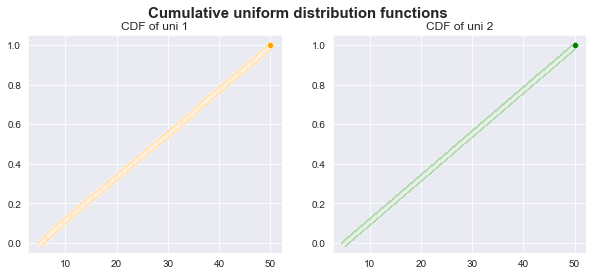

In [366]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
plt.suptitle("Cumulative uniform distribution functions", fontsize="15", fontweight="bold")

sns.scatterplot(x=uni1_sort_x , y=uni1_sort_y_2, ax=ax[0], color='orange')
ax[0].set_title("CDF of uni 1")

sns.scatterplot(x=uni2_sort_x , y=uni2_sort_y_2, ax=ax[1], color='green')
ax[1].set_title("CDF of uni 2")

plt.show()

#### Example: simple Monte Carlo simulation of meteor type occurences

<p>
The uniform probability distribution is useful for predicting values or simulating outcomes<br> 
within a Monte Carlo simulation. Randomly generated data works here as synthetic data.<br> 
Data that is within the outcome spectrum, but not part of the observations.<br> 
Conclusions are drawn from the observations to the random data.<br>  
Methods of inferential statistics are used to back up the claims.<br> 
A simple example explains this more directly.
</p> 

<p>
Astronomers have observed meteors hitting earth, so called fireballs,<br> 
and distinguished 5 types. They use randomly generated data<br> 
between 0 and 1 for predicting the type of possible meteors they have not observed yet,<br> 
because the time frame and resources of their operation is limited.
</p> 

<p>
At first random data is generated and prepared. This random data represents<br> 
the observations here. In a real case scenario this data would be observations,<br> 
which would have been collected by the astronomers.
</p> 



In [367]:

np.random.seed(198)
meteors = np.random.choice(5, p=[0.4, 0.3, 0.2, 0.05, 0.05], size=10000)

print(type(meteors))
print(meteors.shape)
print(np.unique(meteors, return_counts=True))

met_unique, met_freq = np.unique(meteors, return_counts=True)
print(met_unique)
print(met_freq)

<class 'numpy.ndarray'>
(10000,)
(array([0, 1, 2, 3, 4]), array([4015, 2966, 2022,  498,  499], dtype=int64))
[0 1 2 3 4]
[4015 2966 2022  498  499]


In [368]:
meteors_prop = met_freq / meteors.shape[0]
print(np.unique(meteors_prop, return_counts=True))

(array([0.0498, 0.0499, 0.2022, 0.2966, 0.4015]), array([1, 1, 1, 1, 1], dtype=int64))


In [369]:
met_combined = np.column_stack((met_unique, meteors_prop))
met_combined[:10]

array([[0.    , 0.4015],
       [1.    , 0.2966],
       [2.    , 0.2022],
       [3.    , 0.0498],
       [4.    , 0.0499]])

In [370]:
meteors_pd = pd.DataFrame(meteors, columns=['Meteors'])
meteors_pd.head()

,Meteors
0,1
1,4
2,0
3,0
4,1


In [371]:
meteors_vc = meteors_pd.value_counts()
meteors_vc_df = pd.DataFrame(meteors_vc, columns=['Occurrences']).reset_index()
meteors_vc_df['Proportions']  = meteors_vc_df['Occurrences'] / meteors_vc_df['Occurrences'].sum()
meteors_vc_df['Cumulative'] = meteors_vc_df['Proportions'].cumsum()

meteors_vc_df

,Meteors,Occurrences,Proportions,Cumulative
0,0,4015,0.4015,0.4015
1,1,2966,0.2966,0.6981
2,2,2022,0.2022,0.9003
3,4,499,0.0499,0.9502
4,3,498,0.0498,1.0000


In [372]:
meteors_vc_df['Meteors'] = meteors_vc_df['Meteors'].map({0:"Met_0_type_A", 1:"Met_1_type_B",
                                                         2:"Met_2_type_C", 3:"Met_3_type_D",
                                                         4:"Met_4_type_E"})

meteors_vc_df

,Meteors,Occurrences,Proportions,Cumulative
0,Met_0_type_A,4015,0.4015,0.4015
1,Met_1_type_B,2966,0.2966,0.6981
2,Met_2_type_C,2022,0.2022,0.9003
3,Met_4_type_E,499,0.0499,0.9502
4,Met_3_type_D,498,0.0498,1.0000


In [373]:
colsums_1 = pd.DataFrame([['Sum', 1000, 1, 1]],
                          columns=['Meteors','Occurrences','Proportions', 'Cumulative'])


meteors_vc_df = meteors_vc_df.append(colsums_1, ignore_index=True)
meteors_vc_df

,Meteors,Occurrences,Proportions,Cumulative
0,Met_0_type_A,4015,0.4015,0.4015
1,Met_1_type_B,2966,0.2966,0.6981
2,Met_2_type_C,2022,0.2022,0.9003
3,Met_4_type_E,499,0.0499,0.9502
4,Met_3_type_D,498,0.0498,1.0000
5,Sum,1000,1.0000,1.0000


Now the random uniform data is generated.<br>
The assumption is that this could be observations not made yet by the astronomers.

In [374]:
r = stats.uniform.rvs(size=10000)
r[:10]

array([0.85343361, 0.90539298, 0.9568128 , 0.02347692, 0.60625469,
       0.31563708, 0.57124203, 0.31776154, 0.60278721, 0.65226694])

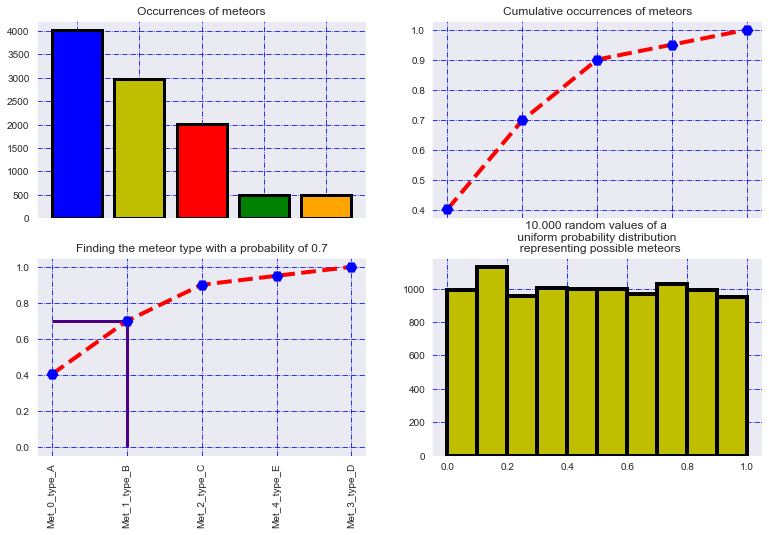

In [375]:
fig, ((ax1, ax2), (ax3, ax4)) =  plt.subplots(2,2, figsize=(13,8))

ax1.bar(x=meteors_vc_df.iloc[0:5,0], height=meteors_vc_df.iloc[0:5,1],
       color=['b', 'y', 'r', 'g', 'orange'], 
       edgecolor='black', linewidth=3)
ax1.set_xticklabels(meteors_vc_df.iloc[0:5,0], Rotation=90)
ax1.set_title('Occurrences of meteors')
ax1.set(xlabel=None, xticklabels=[]) 
ax1.grid(color='b', ls = '-.', lw = 0.8)

ax2.plot(meteors_vc_df.iloc[0:5,0], meteors_vc_df.iloc[0:5,3], 
         linewidth=4, linestyle="--", color='r',
         markeredgecolor='b', marker = "H", markeredgewidth=5)
ax2.set(xlabel=None) 
ax2.set(xticklabels=[])
ax2.set_title('Cumulative occurrences of meteors')
ax2.grid(color='b', ls = '-.', lw = 0.8)


ax3.plot(meteors_vc_df.iloc[0:5,0], meteors_vc_df.iloc[0:5,3], 
         linewidth=4, linestyle="--", color='r',
         markeredgecolor='b', marker = "H", markeredgewidth=5)
ax3.set_xticklabels(meteors_vc_df.iloc[0:5,0], Rotation=90)
ax3.set_title('Finding the meteor type with a probability of 0.7')
ax3.hlines(0.7, xmin=0, xmax=1, linewidth=3, color="indigo", label='PDF')
ax3.vlines(1, ymin=0, ymax=0.7, linewidth=3, color="indigo", label='PDF')
ax3.grid(color='b', ls = '-.', lw = 0.8)

ax4.hist( r, edgecolor="black", linewidth=4, color='y')
ax4.set_title('10.000 random values of a \n uniform probability distribution \n  representing possible meteors')
ax4.grid(color='b', ls = '-.', lw = 0.8)

plt.show()

#### Predicting 10.000 meteor types based on their randomly generated probability

In [376]:
# Uniform random variables = URV
r_df = pd.DataFrame(r, columns=['URV'])
r_df.head()

,URV
0,0.853434
1,0.905393
2,0.956813
3,0.023477
4,0.606255


In [377]:
meteors_mc = pd.concat([meteors_pd, r_df], axis=1)
meteors_mc.drop('Meteors', inplace=True, axis=1)

print(meteors_mc.columns)
print(meteors_mc.head())
print(meteors_mc.info())

Index(['URV'], dtype='object')
        URV
0  0.853434
1  0.905393
2  0.956813
3  0.023477
4  0.606255
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   URV     10000 non-null  float64
dtypes: float64(1)
memory usage: 78.2 KB
None


In [378]:
# This is the useful def-row-apply combination
def meteor_type(row):
    
    if (row['URV'] >= 0) & (row['URV'] <= 0.4015):
        return 'Met_0_type_A'
    elif (row['URV'] > 0.4015) & (row['URV'] <= 0.6981):
        return  'Met_1_type_B'
    elif (row['URV'] > 0.4015) & (row['URV'] <= 0.6981):
        return  'Met_2_type_C'
    elif (row['URV'] > 0.6981) & (row['URV'] <= 0.9003):
        return  'Met_3_type_D'
    elif (row['URV'] > 0.9003) & (row['URV'] <= 1):
        return  'Met_4_type_E'

In [379]:
meteors_mc['Predicted Type'] = meteors_mc.apply(meteor_type, axis=1)

In [380]:
meteors_mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   URV             10000 non-null  float64
 1   Predicted Type  10000 non-null  object 
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [381]:
meteors_mc.head()

,URV,Predicted Type
0,0.853434,Met_3_type_D
1,0.905393,Met_4_type_E
2,0.956813,Met_4_type_E
3,0.023477,Met_0_type_A
4,0.606255,Met_1_type_B


### <b>Normal distribution</b>


<p>
<img src="ND_image.png" alt="Smiley face" height="400" width="600"> 
</p> 

<p>
According to Wikipedia:<br>
"In probability theory, a normal (or Gaussian or Gauss or Laplace–Gauss) distribution is a type of continuous probability distribution for a real-valued random variable."<br>
<a href="https://en.wikipedia.org/wiki/Normal_distribution" target="_blank">Wikipedia</a> 
</p> 

<p>
The most important member of the family is the bell shaped <b>Standard Normal Distribution </b><br>
with mean 0 and standard deviation 1, which has many important statistical properties, of which symmetry is only one.<br>
However the standard one is not the only normal distribution.<br>
This is made clear if you take a look at the Gaussian formula of the Normal probability density function.
</p> 

<p>
<img src="Gaussian_ND_formula.jpg" alt="Gaussian_ND" height="300" width="300" align='left'> 
</p> 

<p>
As it is show here all kind of values for the mean u and standard deviations o.<br>
can be plugged in into the formula. It results in ND with different shapes. <br>
This might be evident, but remembering this can prevent confusion in different cases.
</p> 

<p>
This section starts by creating a a <b>Standard Normal Distribution (SND)</b>  with random numbers by sampling.
</p> 

In [382]:
# Creates a sample of Standard ND
nd_1 = stats.norm.rvs(loc=0, scale=1, size=100000, random_state=49)

print(nd_1[:10])


[-1.04315908 -0.82085569  0.66514585  1.82262686 -1.44158341  0.23380803
  0.33961933  0.23121371 -0.00992582  1.80384779]


In [383]:
nd_1_df = pd.DataFrame(nd_1, columns=['Random variable X'])

nd_1_df.info()
nd_1_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 1 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Random variable X  100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


,Random variable X
0,-1.043159
1,-0.820856
2,0.665146
3,1.822627
4,-1.441583


In [384]:
print(max(nd_1))
print(min(nd_1))

4.429766740745126
-4.390022194041847


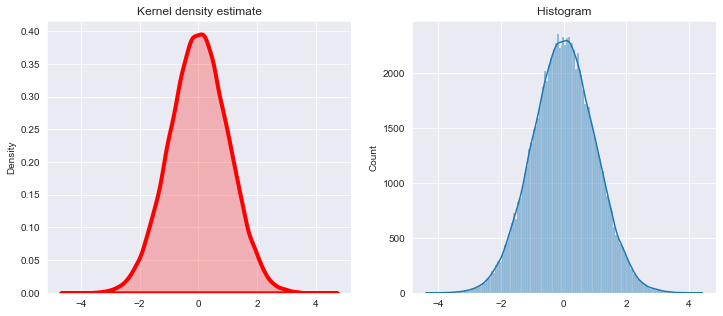

In [385]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

sns.kdeplot(nd_1, color='red', ax=ax1, linewidth=4, fill=True)
ax1.set_title('Kernel density estimate')
sns.histplot(nd_1, ax=ax2, kde=True)
ax2.set_title('Histogram')

plt.show()

In [386]:
nd_1_pd = pd.Series(nd_1)
nd_1_pd.agg(['mean', 'median', 'std', 'min', 'max', 'skew', 'kurt'])

mean      0.001364
median    0.002249
std       1.000355
min      -4.390022
max       4.429767
skew     -0.008389
kurt     -0.025105
dtype: float64

In [387]:
print(stats.kurtosis(nd_1, fisher=False))
print(stats.skew(nd_1))

2.9748358952281295
-0.0083887232647353


In [388]:
nd_55 = stats.norm.rvs(loc=0, scale=1, size=90000, random_state=56)
print(stats.kurtosis(nd_55, fisher=False))
print(stats.skew(nd_55))

2.9757924776450655
-0.009574127949119183


Plotting the probability density function, which assigns each value of the random continuous variable X
a probability or likelihood of outcome Y. (In case of a discrete variable this would be the probability
mass function, which is not ND.)

#### <b>Probability density function of the SND</b>

<p>
The function <b>stats.norm.pdf</b> calculates the probabilties for a certain value of X.<br>
It calculates the probabilties instead of the values of the random variable X.<br>
It uses the formula from above.<br>
It is a point estimation, other than the cumulative distribution function, which is a range estimation.<br>
</p> 



In [389]:
stats.norm.pdf(2, 0, 1)

0.05399096651318806

In [390]:
nd_1_inverse = stats.norm.pdf(nd_1, 0, 1)
print(nd_1_inverse)

[0.2315339  0.28483632 0.31977168 ... 0.05171364 0.27410553 0.38719369]


In [391]:
print(stats.norm.pdf(0, 0, 1))
print(max(nd_1_inverse))

print(stats.norm.pdf(-4.390022194041847, 0, 1))
print(min(nd_1_inverse))

0.3989422804014327
0.3989422803908238
2.6060599933459462e-05
2.1870863911916907e-05


In [392]:
for i in range(-4,5):
    print(i, ":", round(stats.norm.pdf(i, 0, 1),4))


-4 : 0.0001
-3 : 0.0044
-2 : 0.054
-1 : 0.242
0 : 0.3989
1 : 0.242
2 : 0.054
3 : 0.0044
4 : 0.0001


Calculating the probas over a range from -4 to 4.

In [393]:
lb = stats.norm.pdf(range(-4,5), 0, 1)
lb

array([1.33830226e-04, 4.43184841e-03, 5.39909665e-02, 2.41970725e-01,
       3.98942280e-01, 2.41970725e-01, 5.39909665e-02, 4.43184841e-03,
       1.33830226e-04])

In [394]:
# Calculating the probas from -4 to 4 for 10.000 of X 
# First X-values are generated
jk = np.linspace(-4,4,10000)

print(len(jk))
print(max(jk))
print(min(jk))

10000
4.0
-4.0


In [395]:
lbc = stats.norm.pdf(jk, 0, 1)
lbc[:10]

array([0.00013383, 0.00013426, 0.00013469, 0.00013512, 0.00013555,
       0.00013599, 0.00013642, 0.00013686, 0.0001373 , 0.00013774])

In [396]:
stats.norm.pdf(0,0,1)

0.3989422804014327

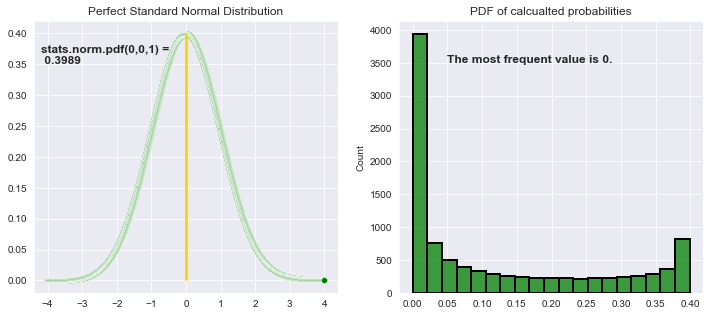

In [397]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

sns.scatterplot(x=jk, y=lbc, ax=ax1, color='green', alpha=1)
ax1.vlines(0,0,0.4, linewidth=3, color='gold')
ax1.set_title('Perfect Standard Normal Distribution')
# ax.text(-40,0.4, "Different shapes of the \nnormal distributions \non the basis of std.",
       # fontdict=fontdict_1 )
ax1.text(-4.2,0.35, "stats.norm.pdf(0,0,1) = \n 0.3989", fontsize=12, fontweight='bold')

sns.histplot(lbc, ax=ax2, edgecolor='black', linewidth=2, color='green')
ax2.set_title('PDF of calcualted probabilities')
ax2.text(0.05, 3500, "The most frequent value is 0.", fontsize=12, fontweight='bold')
plt.show()

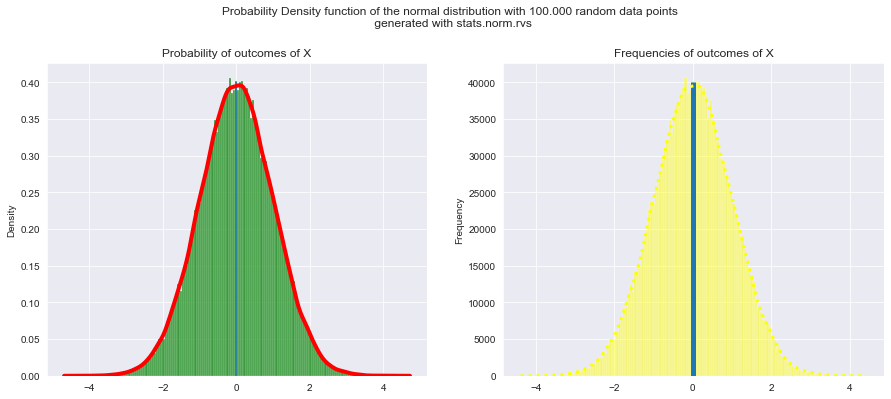

In [398]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.suptitle('Probability Density function of the normal distribution with 100.000 random data points \n generated with stats.norm.rvs')
plt.subplots_adjust(top=0.85)

sns.histplot(nd_1, kde=False, color='green', stat='density', ax=ax1)
ax1.vlines(0, ymin=0, ymax=0.4)
ax1.set_title('Probability of outcomes of X')
sns.kdeplot(nd_1, color='red', ax=ax1, linewidth=4)


sns.histplot(nd_1, kde=True, color='yellow', stat='frequency', ax=ax2,
             line_kws = {"fillstyle":"full", 'linestyle':':', 'linewidth':3, 'color':'b'})
             # color argument in line_kws gets overwritten by histplot color
#ax2.vlines(0, ymin=0, ymax=40000, color='red', linewidth=3)
ax2.set_title('Frequencies of outcomes of X')
ax2.vlines(0, ymin=0, ymax=40000, linewidth=5)


plt.show()


#### <b>scipy.stats.truncnorm</b>

<p>
The standard form of this distribution is a standard normal truncated to the range [a, b].
</p> 


In [399]:
# from scipy.stats import truncnorm
a, b = 100, 400
r = stats.truncnorm.rvs(a, b, size=10000, loc=200, scale=30)

In [400]:
r[:10]

array([3200.00912988, 3200.06159102, 3200.13310243, 3200.03209376,
       3200.02326553, 3200.05639366, 3200.41595124, 3200.11327464,
       3200.81446828, 3200.07630276])

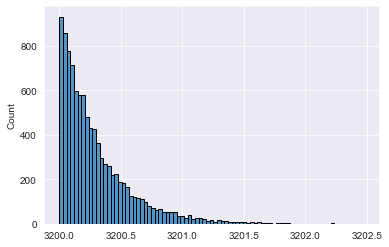

In [401]:
sns.histplot(r, edgecolor='black', linewidth=1)
plt.show()

#### <b>Cumulative distribution function (CDF)</b>

In [402]:
nd_55_sort = np.sort(nd_55)
print(nd_55_sort[:10])
print(np.shape(nd_55_sort))

[-4.34475551 -4.12287674 -3.86713066 -3.8598577  -3.8207662  -3.81881479
 -3.8048497  -3.79704945 -3.73324613 -3.71448955]
(90000,)


Preparing the plot of the CDF

In [403]:
# compare: 
# https://www.geeksforgeeks.org/
# how-to-calculate-and-plot-a-cumulative-distribution-function-with-matplotlib-in-python/

n55s_len = np.shape(nd_55_sort)[0]

y_axis_n55s = np.arange(n55s_len) / float(n55s_len)
x_axis_n55s = nd_55_sort

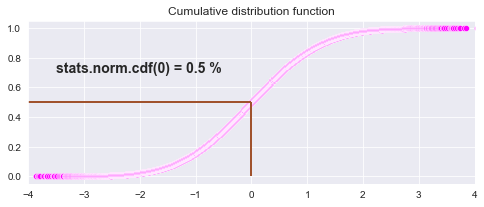

In [404]:
fig, ax = plt.subplots(1,1, figsize=(8,3))

ax = sns.scatterplot(x=x_axis_n55s, y=y_axis_n55s, ci=95, color='magenta')
ax.set_title('Cumulative distribution function')

ax.vlines(0, 0, 0.5, color='sienna', linewidth=2)
ax.hlines(0.5,-4.5,0, color='sienna', linewidth=2)

ax.text(-3.5,0.7, "stats.norm.cdf(0) = 0.5 %", fontweight='bold', fontsize=14)
plt.xlim([-4, 4])

plt.savefig('CDF of ND scipy')
plt.show()

The associated cdf function in scipy is "stats.norm.cdf".

In [405]:

def cdf_SND():
    
    
    nd_55 = stats.norm.rvs(loc=0, scale=1, size=90000, random_state=56)
    
    nd_55_sort = np.sort(nd_55)

    n55s_len = np.shape(nd_55_sort)[0]

    y_axis_n55s = np.arange(n55s_len) / float(n55s_len)
    x_axis_n55s = nd_55_sort

    fig, ax = plt.subplots(1,1, figsize=(10,5))

    sns.scatterplot(x=x_axis_n55s, y=y_axis_n55s, ci=95, color='magenta', ax=ax)
    ax.set_title('Cumulative distribution function', fontweight='bold', fontsize=14)
    plt.xlim([-4,4])
        
    return ax


In [406]:
print(stats.norm.cdf(0))
print(stats.norm.cdf(4))
print(round(stats.norm.cdf(4), 0))

0.5
0.9999683287581669
1.0


The probability of 0 or lower is 0.5 %. This mirrors the symmetric property of the ND.<br>
The probability of 4 or lower is 1 %. This mirrors the symmetric property of the ND.<br>


In [407]:
for i in range(-4,5):
    print("{i}: {cdf} %".format(i=i, cdf=round(stats.norm.cdf(i), 4)))

-4: 0.0 %
-3: 0.0013 %
-2: 0.0228 %
-1: 0.1587 %
0: 0.5 %
1: 0.8413 %
2: 0.9772 %
3: 0.9987 %
4: 1.0 %


Calculations of areas under the ND.

In [408]:
stats.norm.cdf(0) - stats.norm.cdf(-1)
# Area between 0 and -1 is:

0.3413447460685429

In [409]:
stats.norm.cdf(2) - stats.norm.cdf(0)
# Area between 2 and 0 is:

0.4772498680518208

In [410]:
stats.norm.cdf(1) - stats.norm.cdf(-1)
# Area between 1 and -1 is:

0.6826894921370859

#### Using np.random.normal instead scipy.norm.rvs

In [411]:
nd_2 = np.random.normal(loc=0.0, scale=1.0, size=90000)
print(nd_2.shape)

(90000,)


Preparing cumulative probability distribution plot.

In [412]:
nd_2_len = len(nd_2)
y_nd_2 = np.arange(nd_2_len) / float(nd_2_len)
x_nd_2 = np.sort(nd_2)

Plotting PDF and CDF together.

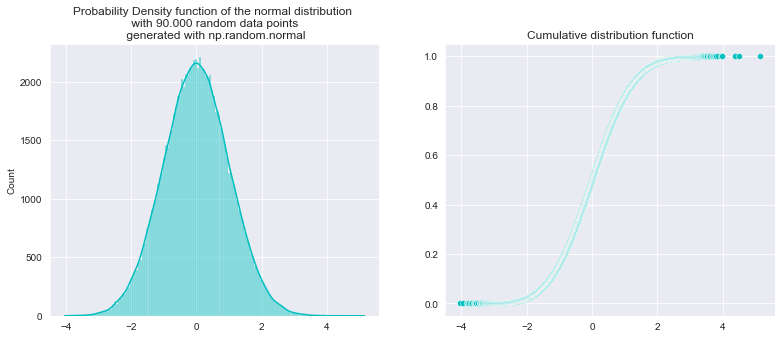

In [413]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,5))
sns.histplot(nd_2, kde=True, color='c', ax=ax1)
ax1.set_title('Probability Density function of the normal distribution \n with 90.000 random data points \n generated with np.random.normal')

sns.scatterplot(x=x_nd_2, y=y_nd_2, color='c', ax=ax2)
ax2.set_title('Cumulative distribution function')

plt.show()

In [414]:
print(stats.kurtosis(nd_1))
print(stats.skew(nd_1))

-0.025164104771870477
-0.0083887232647353


#### <b>Percent point function (inverse of cdf — percentiles)</b>

<p>
The cdf returns the probability of a value over the range of X or lower occuring.<br>
The ppf returns the value of X given the probability.
</p> 


<a href="https://jax.readthedocs.io/en/latest/_autosummary/jax.scipy.stats.norm.ppf.html" target="_blank">Jax</a> 



In [415]:
stats.norm.cdf(1.6448536269514722)

0.95

In [416]:
stats.norm.ppf(0.95, loc=0, scale=1) 

1.6448536269514722

In [417]:
print(stats.norm.cdf(0))
print(stats.norm.ppf(0.5))

0.5
0.0


The inverse relationship of cdf and percent point function is easily<br>
discernible by plotting.

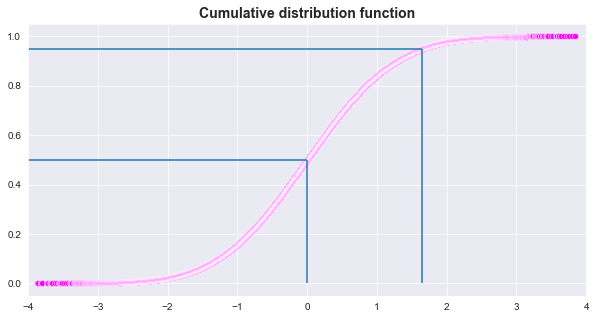

In [418]:
# Returning a plt object from a function:
# https://stackoverflow.com/questions/43925337/matplotlib-returning-a-plot-object
# Thanks!
    
ax=cdf_SND()

ax.hlines(stats.norm.cdf(0), -4.99, 0)
ax.vlines(stats.norm.ppf(0.5), 0, stats.norm.cdf(0))

ax.hlines(stats.norm.cdf(1.6448536269514722), -4.99, stats.norm.ppf(0.95, loc=0, scale=1) )
ax.vlines(stats.norm.ppf(0.95, loc=0, scale=1) , 0, stats.norm.cdf(1.6448536269514722))

plt.show()


In [419]:
print(stats.norm.cdf(-1))
print(stats.norm.ppf(0.15865525393145707))

0.15865525393145707
-1.0


In [420]:
stats.norm.ppf(0.55)

0.12566134685507416

In [421]:
stats.norm.ppf(0.2)

-0.8416212335729142

<p>
<b>Generating standard normal distributions with different means.</b><br>
Changing the mean</b> moves the normal distributions over the X-scale.

In [422]:
#  stats.norm.rvs(loc=0, scale=1, size=10000, random_state)

nd_l_mean = {}

for i in range(0,5):
    nd = stats.norm.rvs(loc=i, scale=1, size=10000, random_state=49)
    nd_l_mean["ndl_{i}".format(i=i)] = nd

print(nd_l_mean.keys())



dict_keys(['ndl_0', 'ndl_1', 'ndl_2', 'ndl_3', 'ndl_4'])


In [423]:
print(nd_l_mean['ndl_0'][:20])
print(nd_l_mean['ndl_1'][:20])

[-1.04315908 -0.82085569  0.66514585  1.82262686 -1.44158341  0.23380803
  0.33961933  0.23121371 -0.00992582  1.80384779  1.36784399 -0.26136216
 -0.44760585  0.5698423  -1.00902002 -1.1289526   1.05954461  1.03044107
  0.1423663   0.59287919]
[-0.04315908  0.17914431  1.66514585  2.82262686 -0.44158341  1.23380803
  1.33961933  1.23121371  0.99007418  2.80384779  2.36784399  0.73863784
  0.55239415  1.5698423  -0.00902002 -0.1289526   2.05954461  2.03044107
  1.1423663   1.59287919]


In [424]:
for k,v in nd_l_mean.items():
    print("{key}: {length}".format(key=k, length=len(v)))

ndl_0: 10000
ndl_1: 10000
ndl_2: 10000
ndl_3: 10000
ndl_4: 10000


In [425]:
for k,v in nd_l_mean.items():
    print("{key}: {max}".format(key=k, max = round(max(v),4)))

ndl_0: 3.8026
ndl_1: 4.8026
ndl_2: 5.8026
ndl_3: 6.8026
ndl_4: 7.8026


In [426]:
for k,v in nd_l_mean.items():
    print("{key}: {min}".format(key=k, min = round(min(v),4)))

ndl_0: -3.8127
ndl_1: -2.8127
ndl_2: -1.8127
ndl_3: -0.8127
ndl_4: 0.1873


<b>Pandas - visuazlization and aggregation</b>

In [427]:
ndl_mean_pd = pd.DataFrame(nd_l_mean)
print(ndl_mean_pd.head())
print(ndl_mean_pd.shape)

      ndl_0     ndl_1     ndl_2     ndl_3     ndl_4
0 -1.043159 -0.043159  0.956841  1.956841  2.956841
1 -0.820856  0.179144  1.179144  2.179144  3.179144
2  0.665146  1.665146  2.665146  3.665146  4.665146
3  1.822627  2.822627  3.822627  4.822627  5.822627
4 -1.441583 -0.441583  0.558417  1.558417  2.558417
(10000, 5)


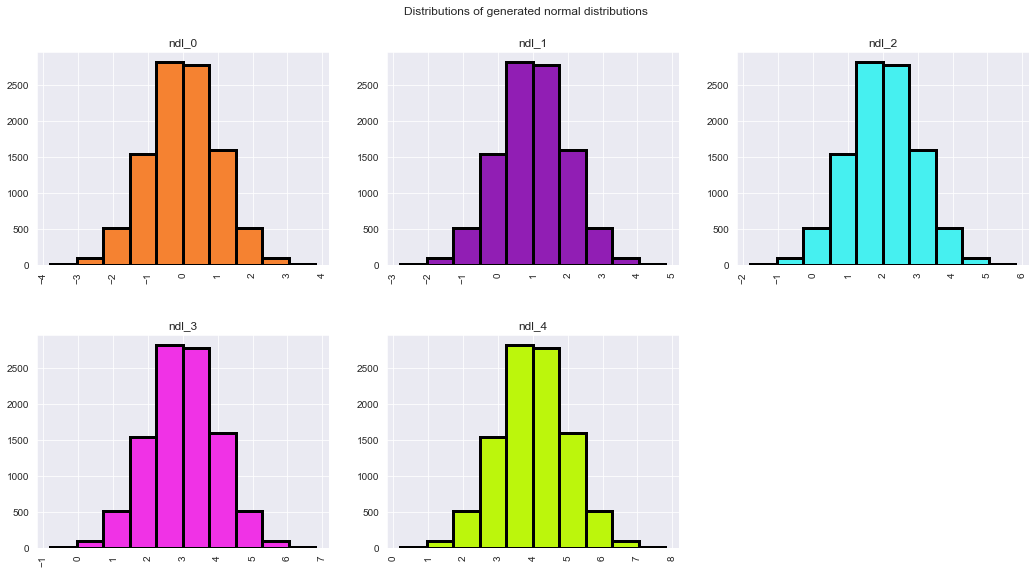

In [428]:
# Prepare color list assign each plot a different color
color_list=['#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
            '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
            '#f58231', '#911eb4', '#46f0f0', '#f032e6']

np.warnings.filterwarnings('ignore')

ndl_mean_pd_cols=list(ndl_mean_pd.columns)

fig, axs = plt.subplots(2,3, figsize=(15,8))

plt.subplots_adjust(left=0.2, bottom=0.1, right=0.8, top=0.9, wspace=.3, hspace=0.5)
plt.tight_layout(h_pad=5, pad=3)

axs = axs.ravel()
fig.suptitle('Distributions of generated normal distributions',  x=0.5, y=1.02)


for i in range(0,6):
    if i < 5:
        
        axs[i].hist(ndl_mean_pd.iloc[:10000,i], color=color_list[i], edgecolor='black',
                    linewidth=3)
        axs[i].set_title(ndl_mean_pd_cols[i])
        for tick in axs[i].get_xticklabels():
            tick.set_rotation(90)  
    else:
        # axs[i].axes.get_xaxis().set_visible(False)
        axs[i].axis('off')
   
plt.show()



#### <b> Normal distribution - probability density function with shifting means</b>

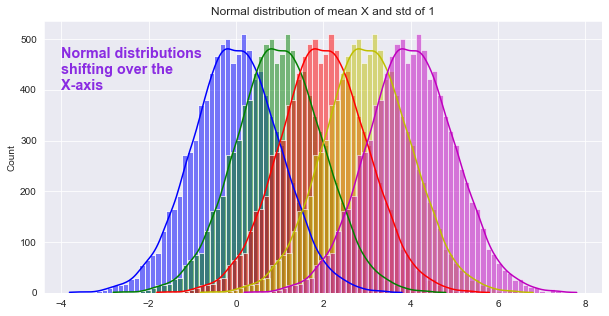

In [429]:
sns.set_style('darkgrid')

colors_1 = ['b', 'g', 'r', 'y', 'm']

fig, ax = plt.subplots(1,1, figsize=(10,5))

for e,(k,v) in enumerate(nd_l_mean.items()):
        ax = sns.histplot(nd_l_mean[k], kde=True, color=colors_1[e])

ax.set_title("Normal distribution of mean X and std of 1")
ax.text(-4,400, "Normal distributions\nshifting over the \nX-axis",
        fontdict=fontdict_1)

plt.show()

In [430]:
ndl_agg_22 = ndl_mean_pd.agg(['mean', 'median', 'std', 'min', 'max', 'skew', 'kurt'])
ndl_agg_22

,ndl_0,ndl_1,ndl_2,ndl_3,ndl_4
mean,0.002388,1.002388,2.002388,3.002388,4.002388
median,-0.001359,0.998641,1.998641,2.998641,3.998641
std,0.999521,0.999521,0.999521,0.999521,0.999521
min,-3.812705,-2.812705,-1.812705,-0.812705,0.187295
max,3.802603,4.802603,5.802603,6.802603,7.802603
skew,0.011291,0.011291,0.011291,0.011291,0.011291
kurt,0.094096,0.094096,0.094096,0.094096,0.094096


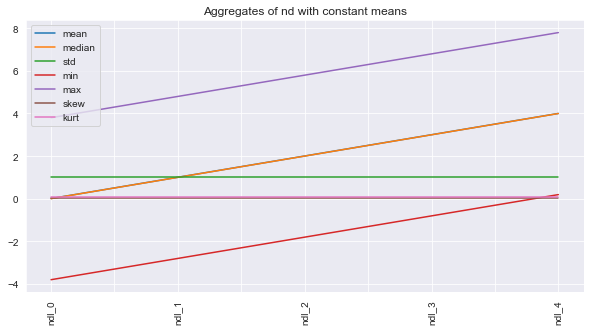

In [431]:
ndl_agg_22.transpose().plot(figsize=(10,5), rot=90, title="Aggregates of nd with constant means")
plt.show()

<p>
<b>Skewness</b> does not change and the nd remain nearly perfectly symmetric.<br>
Half of the data points are remaining on both side of the mean.<br>
This is also indicated with a constant kurtosis.<br>
The means and others are shifting.
</p> 

<p>
<b>Changing the standard deviation</b> changes the shape of the normal distributions.<br>
The measure of thickness of the tail ends compared to a normal distribution with 
mean 0 and std 1.
</p> 

In [432]:

nd_l_std_44 = {}

for i in range(1,10):
    nd_std_44 = stats.norm.rvs(loc=0, scale=i, size=1000, random_state=5)
    nd_l_std_44["ndl_std_{i}".format(i=i)] = nd_std_44

print(nd_l_std_44.keys())

dict_keys(['ndl_std_1', 'ndl_std_2', 'ndl_std_3', 'ndl_std_4', 'ndl_std_5', 'ndl_std_6', 'ndl_std_7', 'ndl_std_8', 'ndl_std_9'])


In [433]:
print(nd_l_std_44['ndl_std_1'][:20])
print(nd_l_std_44['ndl_std_2'][:20])
print(nd_l_std_44['ndl_std_3'][:20])

[ 0.44122749 -0.33087015  2.43077119 -0.25209213  0.10960984  1.58248112
 -0.9092324  -0.59163666  0.18760323 -0.32986996 -1.19276461 -0.20487651
 -0.35882895  0.6034716  -1.66478853 -0.70017904  1.15139101  1.85733101
 -1.51117956  0.64484751]
[ 0.88245497 -0.6617403   4.86154237 -0.50418426  0.21921968  3.16496223
 -1.81846481 -1.18327332  0.37520645 -0.65973992 -2.38552922 -0.40975302
 -0.71765789  1.20694321 -3.32957706 -1.40035808  2.30278202  3.71466201
 -3.02235912  1.28969502]
[ 1.32368246 -0.99261046  7.29231356 -0.75627639  0.32882952  4.74744335
 -2.72769721 -1.77490997  0.56280968 -0.98960987 -3.57829384 -0.61462953
 -1.07648684  1.81041481 -4.99436559 -2.10053711  3.45417303  5.57199302
 -4.53353867  1.93454253]


Putting the dict into a data frame.

In [434]:
nd_l_std_pd_44 = pd.DataFrame(nd_l_std_44)
print(nd_l_std_pd_44.shape)
print(nd_l_std_pd_44.head())

(1000, 9)
   ndl_std_1  ndl_std_2  ndl_std_3  ndl_std_4  ndl_std_5  ndl_std_6  \
0   0.441227   0.882455   1.323682   1.764910   2.206137   2.647365   
1  -0.330870  -0.661740  -0.992610  -1.323481  -1.654351  -1.985221   
2   2.430771   4.861542   7.292314   9.723085  12.153856  14.584627   
3  -0.252092  -0.504184  -0.756276  -1.008369  -1.260461  -1.512553   
4   0.109610   0.219220   0.328830   0.438439   0.548049   0.657659   

   ndl_std_7  ndl_std_8  ndl_std_9  
0   3.088592   3.529820   3.971047  
1  -2.316091  -2.646961  -2.977831  
2  17.015398  19.446169  21.876941  
3  -1.764645  -2.016737  -2.268829  
4   0.767269   0.876879   0.986489  


In [435]:
print(nd_l_std_pd_44.tail())

     ndl_std_1  ndl_std_2  ndl_std_3  ndl_std_4  ndl_std_5  ndl_std_6  \
995   0.799389   1.598778   2.398167   3.197556   3.996945   4.796333   
996   0.773021   1.546042   2.319062   3.092083   3.865104   4.638125   
997  -0.054856  -0.109711  -0.164567  -0.219423  -0.274279  -0.329134   
998   0.316907   0.633813   0.950720   1.267626   1.584533   1.901439   
999   0.111658   0.223315   0.334973   0.446630   0.558288   0.669945   

     ndl_std_7  ndl_std_8  ndl_std_9  
995   5.595722   6.395111   7.194500  
996   5.411146   6.184167   6.957187  
997  -0.383990  -0.438846  -0.493702  
998   2.218346   2.535252   2.852159  
999   0.781603   0.893261   1.004918  


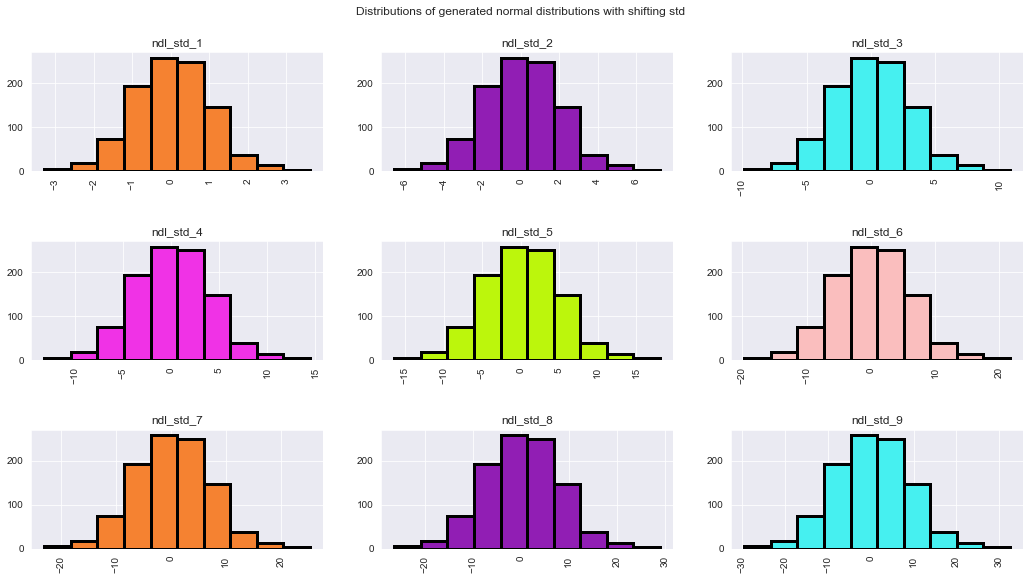

In [436]:
# Prepare color list assign each plot a different color
color_list=['#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
            '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
            '#f58231', '#911eb4', '#46f0f0', '#f032e6']

np.warnings.filterwarnings('ignore')

nd_l_std_pd_44_cols=list(nd_l_std_pd_44.columns)

fig, axs = plt.subplots(3,3, figsize=(15,8))

plt.subplots_adjust(left=0.2, bottom=0.1, right=0.8, top=0.9, wspace=.3, hspace=0.5)
plt.tight_layout(h_pad=5, pad=3)

axs = axs.ravel()
fig.suptitle('Distributions of generated normal distributions with shifting std',  x=0.5, y=1.02)


for i in range(0,9):
    if i < 9:
        
        axs[i].hist(nd_l_std_pd_44.iloc[:,i], color=color_list[i], edgecolor='black',
                    linewidth=3)
        axs[i].set_title(nd_l_std_pd_44_cols[i])
        for tick in axs[i].get_xticklabels():
            tick.set_rotation(90)  
    else:
        # axs[i].axes.get_xaxis().set_visible(False)
        axs[i].axis('off')
plt.show()



Same with Pandas plot.

<Figure size 432x288 with 0 Axes>

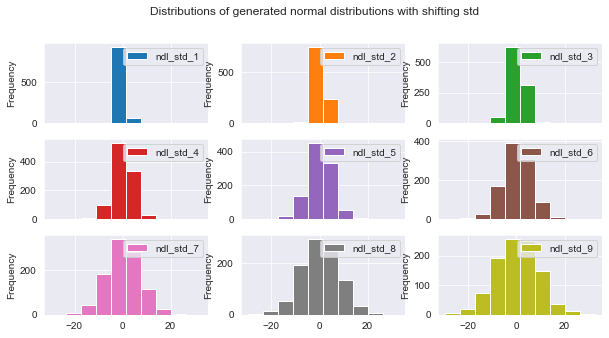

In [437]:
plt.tight_layout()
plt.suptitle("sfds")
nd_l_std_pd_44.plot(kind='hist', subplots=True, figsize=(10,5), layout=(3,3),
                    title="Distributions of generated normal distributions with shifting std")
plt.show()

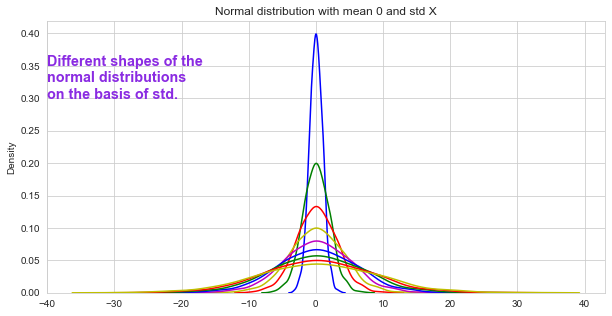

In [438]:
sns.set_style('whitegrid')

# create colors list of 10
colors_2 = list(itertools.repeat(['b', 'g', 'r', 'y', 'm'], 2))
colors_3 = colors_2[0] + colors_2[1]
# print(colors_3)

fig, ax = plt.subplots(1,1, figsize=(10,5))

for i,(k,v) in enumerate(nd_l_std_44.items()):
    ax = sns.kdeplot(nd_l_std_44[k], color = colors_3[i], legend=True)
    
ax.set_title("Normal distribution with mean 0 and std X")   
ax.text(-40,0.3, "Different shapes of the \nnormal distributions \non the basis of std.",
        fontdict=fontdict_1 )

plt.savefig("ND with mean 0 and X")
    
plt.show()

<p>
<b>Kurtosis</b><br>
<b>scipy.stats.kurtosis(a, axis=0, fisher=True, bias=True, nan_policy='propagate')</b><br>
Compute the kurtosis (Fisher or Pearson) of a dataset.<br>
Kurtosis is the fourth central moment divided by the square of the variance.<br> 
If Fisher’s definition is used, then 3.0 is subtracted from the result to give 0.0 for a normal distribution.
</p> 
<p>
The larger the difference from 0 the larger the <b>excess kurtosis</b>.
</p> 


In [439]:
kurt_1_Pear = stats.kurtosis(nd_l_std_44['ndl_std_1'], fisher=False, bias=False)
print(kurt_1_Pear)

# Fisher is equal to excess kurtosis
kurt_1_Fisher = stats.kurtosis(nd_l_std_44['ndl_std_1'], fisher=True, bias=False)
print(kurt_1_Fisher)

# Excess kurtosis with Pearson
kurt_1_excess = kurt_1_Pear - 3
print(kurt_1_excess)

3.248817709748905
0.24881770974890483
0.24881770974890483


In [440]:
stats.kurtosis(nd_l_std_44['ndl_std_3'], fisher=True)

0.24158135568777572

In [441]:
kurt_std_1 = dict()

for k,v in nd_l_std_44.items():
    kurt_std_1[k] = stats.kurtosis(v, fisher=True)

print(kurt_std_1)

{'ndl_std_1': 0.2415813556877744, 'ndl_std_2': 0.2415813556877744, 'ndl_std_3': 0.24158135568777572, 'ndl_std_4': 0.2415813556877744, 'ndl_std_5': 0.2415813556877744, 'ndl_std_6': 0.24158135568777572, 'ndl_std_7': 0.24158135568777483, 'ndl_std_8': 0.2415813556877744, 'ndl_std_9': 0.24158135568777528}


In [442]:
kurt_std_1 = dict()

for k,v in nd_l_std_44.items():
    kurt_std_1[k] = stats.kurtosis(v, fisher=False)

print(kurt_std_1)

{'ndl_std_1': 3.2415813556877744, 'ndl_std_2': 3.2415813556877744, 'ndl_std_3': 3.2415813556877757, 'ndl_std_4': 3.2415813556877744, 'ndl_std_5': 3.2415813556877744, 'ndl_std_6': 3.2415813556877757, 'ndl_std_7': 3.241581355687775, 'ndl_std_8': 3.2415813556877744, 'ndl_std_9': 3.2415813556877753}


In [443]:
nd_l_std_agg_44 = nd_l_std_pd_44.agg(['mean', 'median', 'std', 'min', 'max', 'skew', 'kurt'])
nd_l_std_agg_44

,ndl_std_1,ndl_std_2,ndl_std_3,ndl_std_4,ndl_std_5,ndl_std_6,ndl_std_7,ndl_std_8,ndl_std_9
mean,0.033277,0.066554,0.099831,0.133108,0.166385,0.199662,0.232939,0.266216,0.299493
median,0.023726,0.047451,0.071177,0.094902,0.118628,0.142354,0.166079,0.189805,0.213530
std,0.990384,1.980768,2.971152,3.961537,4.951921,5.942305,6.932689,7.923073,8.913457
min,-3.283915,-6.567831,-9.851746,-13.135662,-16.419577,-19.703493,-22.987408,-26.271324,-29.555239
max,3.612319,7.224637,10.836956,14.449274,18.061593,21.673911,25.286230,28.898548,32.510867
skew,0.002940,0.002940,0.002940,0.002940,0.002940,0.002940,0.002940,0.002940,0.002940
kurt,0.248818,0.248818,0.248818,0.248818,0.248818,0.248818,0.248818,0.248818,0.248818


#### Kurtosis
<p>
<b>Why are the values of the kurtosis similar?</b><br>
I expected significant different kurtosis values depending on the shifting standard deviatons.
</p> 

<p>
Okay, this expectation is wrong. Not that it is entirely foolish.
For a long time the discussion around the <b>"peakedness"</b>, but the discussion
is cleared. Kurtosis is a measure of outliers hidden in the tails.
It measure not the shape of the distribution.
</p> 

<p>
"Any standardized values that are less than 1 (i.e., data within one standard deviation of the mean, where the "peak" would be), contribute virtually nothing to kurtosis, since raising a number that is less than 1 to the fourth power makes it closer to zero. The only data values (observed or observable) that contribute to kurtosis in any meaningful way are those outside the region of the peak; i.e., the <b>outliers</b>. Therefore, kurtosis measures outliers only; it measures nothing about the "peak"."<br>
<a href="https://en.wikipedia.org/wiki/Kurtosis#Interpretation" target="_blank">Wikipedia</a>    
</p> 

<p>
<b>Now as it is not the peakedness, but the outliers, should the kurtosis change anyway as the tails 
are changing with the standard deviations?</b><br>
No, regardless of the variance, all normal distributions have a kurtosis of 0 (or 3).
All normal distributions are normal distributions, with expected values given a certain mean 
and std, where symmetrically 50% of values are on each side.<br> 
It helps now to remember that the Standard ND is only one special case of the family.
</p> 



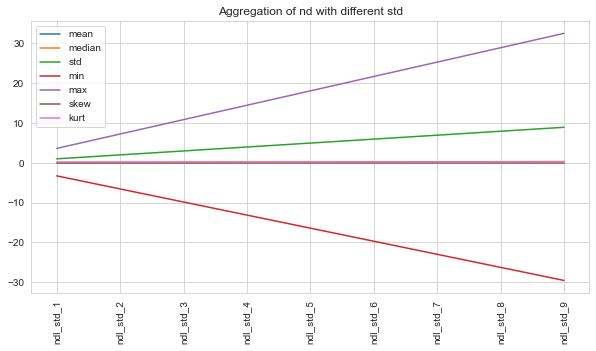

In [444]:
nd_l_std_agg_44.transpose().plot(rot=90, figsize=(10,5), title="Aggregation of nd with different std")
plt.show()

### Exploring different probability densities of the ND

<p>
For this the function stats.norm.pdf is of good use, which calculates the probabilities for 
values of the random variable X.
</p> 

#### <b>Probability density between 0 and 1</b>

In [445]:
# Like above
cdf_0 = stats.norm.cdf(0)
print(cdf_0)

cdf_1 = stats.norm.cdf(1)
print(cdf_1)

cdf_10 = cdf_1 - cdf_0 
print("Area under the curve: {cdf_10} %".format(cdf_10=round(cdf_10*100,2)))

0.5
0.8413447460685429
Area under the curve: 34.13 %


<p>
Plotting or shading the area under the curve between 0 an 1.<br>
There are two plots to be made.<br> 
The plot of the KDE or probability density function and the<br>
plot of the shaded area.<br> 
This is carried out here step by step.
</p> 

In [446]:
# PDF or KDE plot
# A plot has a X-axis and Y-axis
# Both axis types need values.
# This creates the values on the X-axis between -4 and 4

X_pdf = np.arange(-4,4,0.01)
print(len(X_pdf))
print(X_pdf[:5])

800
[-4.   -3.99 -3.98 -3.97 -3.96]


In [447]:
Y_pdf = stats.norm.pdf(X_pdf, 0, 1)
print(len(Y_pdf))
print(Y_pdf[:5])

800
[0.00013383 0.00013928 0.00014495 0.00015083 0.00015693]


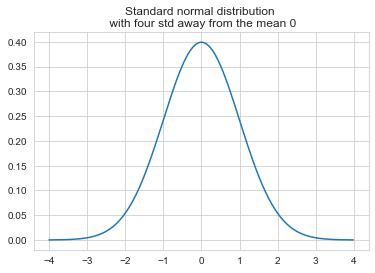

In [448]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_pdf, Y_pdf)
ax.set_title('Standard normal distribution \n with four std away from the mean 0')
plt.show()

#### Shaded area plot between 0 and 1
<p>
Now the area between 0 and 1 is shaded.<br>
This represents the probability of 34.13 %.
</p> 

#### matplotlib.pyplot.fill_between

<p>
matplotlib.pyplot.fill_between(x, y1, y2=0, where=None, interpolate=False, step=None, *, data=None, **kwargs)<br>
<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html" target="_blank">matplotlib</a> 
</p> 


In [449]:
# This creates the values on the X-axis between 0 and 1
X_cdf = np.arange(0,1, 0.01)

print(len(X_cdf))
print(X_cdf[:5])


100
[0.   0.01 0.02 0.03 0.04]


In [450]:
print(min(X_cdf))
print(max(X_cdf ))


0.0
0.99


These are 1000 x values on the X-axis between 0 an 1.<br>
Every X-value on the SND is associated with a likelihood of occurence.

In [451]:
Y_cdf = stats.norm(0,1).pdf(X_cdf)
print(len(Y_cdf))
print(Y_cdf[:5])

100
[0.39894228 0.39892233 0.3988625  0.3987628  0.39862325]


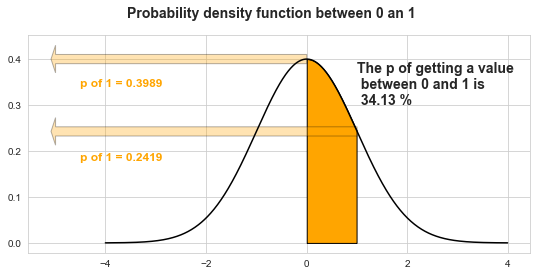

In [452]:
fig = plt.figure(figsize=(9,4))
plt.suptitle('Probability density function between 0 an 1',
             fontweight='bold', fontsize=14)

ax1 = fig.add_subplot(1,1,1)
ax1.plot(X_pdf, Y_pdf, color='black')
ax1.text(1, 0.3, "The p of getting a value \n between 0 and 1 is \n 34.13 %", 
         fontsize=14, fontweight='bold')

ax2 = fig.add_subplot(1,1,1)
ax2.fill_between(X_cdf, Y_cdf, color='orange', edgecolor='black')

# matplotlib.pyplot.arrow(x, y, dx, dy, **kwargs)
plt.arrow(0,stats.norm.pdf(0,0,1), -4.99, 0, width=0.02, ec='black', color='orange', alpha=0.3)
plt.arrow(1,stats.norm.pdf(1,0,1), -5.99, 0, width=0.02, ec='black', color='orange', alpha=0.3)    

plt.text(-4.5, 0.18, "p of 1 = 0.2419", fontsize=12, 
         color='orange', fontweight='bold')
plt.text(-4.5, 0.34, "p of 1 = 0.3989", fontsize=12, 
         color='orange', fontweight='bold')


# stats.norm.pdf(i, 0, 1),4)
plt.show()

In [453]:
print(stats.norm.pdf(0,0,1))
print(stats.norm.pdf(1,0,1))

0.3989422804014327
0.24197072451914337


#### <b>Probability of X one standard deviation away from the mean</b>

In [454]:
cdf_minus_1 = stats.norm.cdf(-1,0,1)
# print(cdf_minus_1)

cdf_minus10 = (cdf_0 - cdf_minus_1) + (cdf_1 - cdf_0)
print(cdf_minus10)

0.6826894921370859


In [455]:
# This creates the values on the X-axis between -4 and 4
X_cdf_2 = np.arange(-1,1, 0.01)

print(len(X_cdf_2))
print(X_cdf_2[:5])


200
[-1.   -0.99 -0.98 -0.97 -0.96]


In [456]:
print(min(X_cdf_2))
print(max(X_cdf_2))


-1.0
0.9900000000000018


In [457]:
Y_pdf_2 = stats.norm.pdf(X_cdf_2, 0, 1)

print(len(Y_pdf_2))
print(Y_pdf[:5])

200
[0.00013383 0.00013928 0.00014495 0.00015083 0.00015693]


In [458]:
Y_pdf_2_df = pd.DataFrame(Y_pdf_2, columns=['p'])
Y_pdf_2_df.agg(['min', 'max'])


,p
min,0.241971
max,0.398942


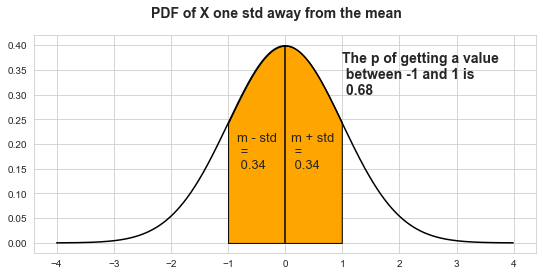

In [459]:
fig = plt.figure(figsize=(9,4))
plt.suptitle('PDF of X one std away from the mean',
             fontweight='bold', fontsize=14)

ax1 = fig.add_subplot(1,1,1)
ax1.plot(X_pdf, Y_pdf, color='black')
ax1.text(1, 0.3, "The p of getting a value \n between -1 and 1 is \n 0.68", 
         fontsize=14, fontweight='bold')

ax2 = fig.add_subplot(1,1,1)
ax2.fill_between(X_cdf_2, Y_pdf_2, color='orange', edgecolor='black')

plt.vlines(0,0, 0.4, color='black')
plt.text(-0.85, 0.15, "m - std \n = \n 0.34", fontsize=13)
plt.text(0.1 , 0.15, "m + std \n = \n 0.34", fontsize=13)

plt.show()

#### <b> User-defined function for plotting the PDF </b>

<p>
to make it easier. This function can be more elaborated.
</p> 

In [460]:
def p_between(X1, X2):
    
    X_pdf = np.arange(-4,4,0.01)
    Y_pdf = stats.norm.pdf(X_pdf, 0, 1)
    
    X_cdf = np.arange(X1,X2, 0.01)
    Y_cdf = stats.norm.pdf(X_cdf, 0, 1)
    
    # plotting
    
    fig = plt.figure(figsize=(9,4))
    plt.suptitle('Probability density function between X1 and X2',
                 fontweight='bold', fontsize=14)

    ax1 = fig.add_subplot(1,1,1)
    ax1.plot(X_pdf, Y_pdf, color='black')
    

    ax2 = fig.add_subplot(1,1,1)
    ax2.fill_between(X_cdf, Y_cdf, color='orange', edgecolor='black')
    
    plt.vlines(0,0,0.4, color='black', linewidth=3)

    
    return plt.show()

As we are here a function for calculating the probability between two values.

In [461]:
def p_between_2(X1, X2):
    return stats.norm.cdf(X2)  - stats.norm.cdf(X1) 
    

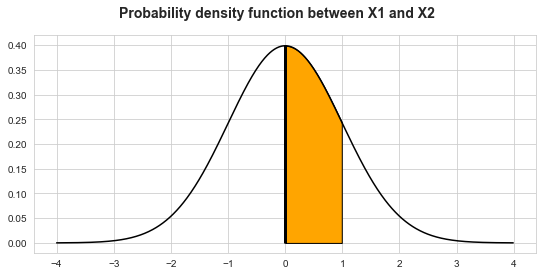

In [462]:
p_between(X1=0, X2=1)

In [463]:
p_between_2(X1=0, X2=1)

0.3413447460685429

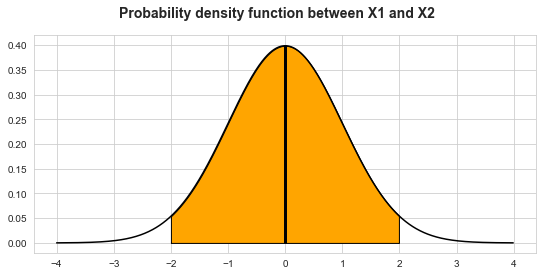

In [464]:
p_between(X1=-2, X2=2)

In [465]:
p_between_2(X1=-2, X2=2)

0.9544997361036416

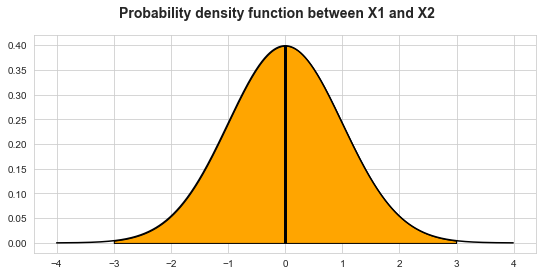

In [466]:
p_between(X1=-3, X2=3)

In [467]:
p_between_2(X1=-3, X2=3)

0.9973002039367398

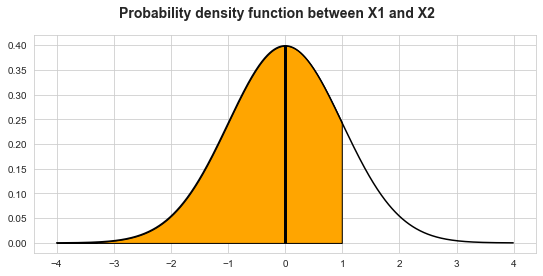

In [468]:
p_between(X1=-4, X2=1)

In [469]:
p_between_2(X1=-4, X2=1)

0.8413130748267098

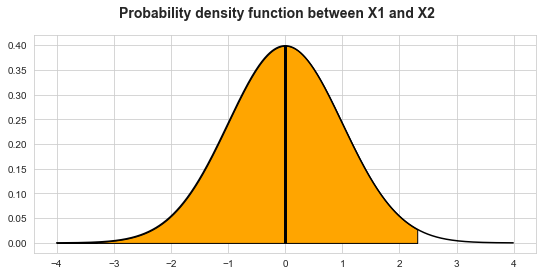

In [470]:
p_between(X1=-4, X2=2.32)

In [471]:
p_between_2(X1=-4, X2=2.32)

0.9897978900894472

#### <b>Tail probability<b>

<p>
from a value of X. The function of <b>stats.norm.sf</b> is the complement of the cdf.
</p> 



In [472]:
# right side of the SND
stats.norm.sf(0)

0.5

In [473]:
# The right tail p from the X=3
stats.norm.sf(2)

0.022750131948179195

In [474]:
stats.norm.cdf(2)

0.9772498680518208

In [475]:
stats.norm.sf(2) + stats.norm.cdf(2)

1.0

In [476]:
p_between_2(X1=2, X2=4)

0.02271846070634609

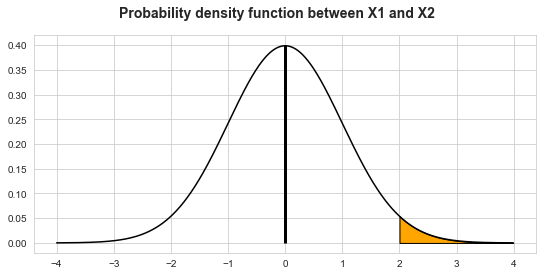

In [477]:
p_between(X1=2, X2=4)

In [478]:
stats.norm.sf(-3)

0.9986501019683699

In [479]:
stats.norm.cdf(-3)

0.0013498980316300933

In [480]:
p_between_2(X1=-4, X2=-3)

0.0013182267897969735

In [481]:
stats.norm.sf(-3) + stats.norm.cdf(-3)

1.0

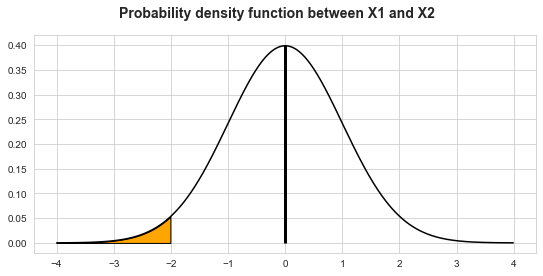

In [482]:
p_between(X1=-4, X2=-2)

#### <b>Intervals</b>

In [483]:
# Between which values of the variable X are 95% of the values?
alpha=0.95

stats.norm.interval(0.95)

(-1.959963984540054, 1.959963984540054)

In [484]:
stats.norm.cdf(1.959963984540054) - stats.norm.sf(1.959963984540054)

0.95

In [485]:
p_between_2(X1=-1.959963984540054, X2=1.959963984540054)

0.95

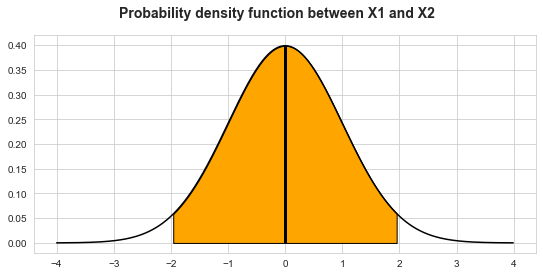

In [486]:
p_between(X1=-1.959963984540054, X2=1.959963984540054)

#### <b>Z-scores</b>

<p>
A important measure in statistical testing is the z-score:<br>
</p> 

<p>
"Simply put, a z-score (also called a standard score) gives you an idea of how far from the mean a data point is. But more technically it’s a measure of how many standard deviations below or above the population mean a raw score is."<br>
<a href="https://www.statisticshowto.com/probability-and-statistics/z-score/" target="_blank">statisticshowto</a> 
</p> 

<p>
The z-score is here not further discussed, besides this below.<br>
A user defined function is compared to the scipy functions.
</p> 


In [487]:
def z_score(x, m, std):
    z_scores=[]
    for i in x:
        z = (i - m) / std
        z_scores.append(z)
    return (z_scores)

In [488]:
z_score([3,4],23,2)

[-10.0, -9.5]

In [489]:
z_score([3,4],0,1)

[3.0, 4.0]

In [490]:
a = np.array([ 0.7972,  0.0767,  0.4383,  0.7866,  0.8091, 
              0.1954,  0.6307,  0.6599,  0.1065,  0.0508])

a_mean = np.mean(a)
print(a_mean)

a_std = np.std(a)
print(a_std)

0.45511999999999986
0.30346538451691657


In [491]:
z_ud = z_score(a,a_mean,a_std)
print(len(z_ud))

10


In [492]:
z_scipy = stats.zscore(np.array(a))
print(len(z_scipy))

10


In [493]:
z_ud == z_scipy

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [494]:
z_df = pd.DataFrame(zip(z_ud, z_scipy), columns=['z_ud', 'z_scipy'])
z_df['Match'] = (z_ud == z_scipy)
z_df

,z_ud,z_scipy,Match
0,1.127246,1.127246,True
1,-1.246996,-1.246996,True
2,-0.055426,-0.055426,True
3,1.092316,1.092316,True
4,1.166459,1.166459,True
5,-0.855847,-0.855847,True
6,0.578583,0.578583,True
7,0.674805,0.674805,True
8,-1.148797,-1.148797,True
9,-1.332343,-1.332343,True


#### <b>Example - car dealership</b>

<p>
A car dealership sells medium sized cars of a price range of 15.000 to 40.000 Euros.<br>
The cars are sold with additional equipment and sometimes with discounts.<br>
The manager has gathered sales data and wants to know the payments he can expect from a customer.
</p> 


In [495]:
car_data = stats.norm.rvs(loc=26230, scale=3675, size=43899, random_state=345).round(0)

car_data_df = pd.DataFrame(car_data, columns=['Payments'])

car_data_df.info()
car_data_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43899 entries, 0 to 43898
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Payments  43899 non-null  float64
dtypes: float64(1)
memory usage: 343.1 KB


,Payments
0,31629.0
1,22003.0
2,35488.0
3,25927.0
4,26107.0


In [496]:
car_data_df.describe()

,Payments
count,43899.000000
mean,26240.097565
std,3676.734724
min,11613.000000
25%,23767.000000
50%,26221.000000
75%,28750.500000
max,41223.000000


In [497]:
stats.describe(car_data_df)

DescribeResult(nobs=43899, minmax=(array([11613.]), array([41223.])), mean=array([26240.09756486]), variance=array([13518378.22992231]), skewness=array([0.00304191]), kurtosis=array([-0.05488781]))

max 41223.000000 = array([41223.]

#### <b>Constructing a frequency table</b>

<p>
of 20 classes or bins.
</p> 


In [498]:
carhist_a, carhist_b = np.histogram(car_data,bins=20)

In [499]:
# values of X - frequency classes
print(carhist_a)
print(len(carhist_a))

[   8   17   76  285  723 1493 2838 4423 6134 6821 6645 5749 4049 2493
 1282  584  197   62   12    8]
20


In [500]:
# values of Y - frequencies
print(carhist_b)
print(len(carhist_b))

carhist_c = np.delete(carhist_b, 0)
print(len(carhist_c))

[11613.  13093.5 14574.  16054.5 17535.  19015.5 20496.  21976.5 23457.
 24937.5 26418.  27898.5 29379.  30859.5 32340.  33820.5 35301.  36781.5
 38262.  39742.5 41223. ]
21
20


In [501]:
carhist_c.shape[0]

20

In [502]:
car_frequencies =\
pd.DataFrame(list(zip(carhist_c, carhist_a)), columns=['Frequency classes', 'Frequency'],
             index=list(range(1,21)))

car_frequencies['Proportion'] = car_frequencies['Frequency'] / car_frequencies['Frequency'].sum()

car_frequencies.head(10)

,Frequency classes,Frequency,Proportion
1,13093.5,8,0.000182
2,14574.0,17,0.000387
3,16054.5,76,0.001731
4,17535.0,285,0.006492
5,19015.5,723,0.016470
6,20496.0,1493,0.034010
7,21976.5,2838,0.064648
8,23457.0,4423,0.100754
9,24937.5,6134,0.139730
10,26418.0,6821,0.155379


In [503]:
car_relfreq = stats.relfreq(car_data, numbins=20)
car_relfreq.frequency

array([4.55591244e-05, 2.73354746e-04, 1.11619855e-03, 4.66981025e-03,
       1.36449577e-02, 2.92945170e-02, 6.20515274e-02, 1.01300713e-01,
       1.44422424e-01, 1.62964988e-01, 1.58933005e-01, 1.35697852e-01,
       9.14599421e-02, 5.36686485e-02, 2.57409053e-02, 1.02280234e-02,
       3.37137520e-03, 7.74505114e-04, 2.73354746e-04, 6.83386865e-05])

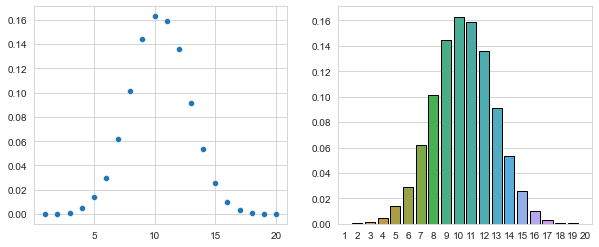

In [504]:
fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(121)
sns.scatterplot(x=list(np.arange(1,21,1)), y=list(car_relfreq.frequency), ax=ax1)

ax2 = fig.add_subplot(122)
sns.barplot(x=list(np.arange(1,21,1)), y=list(car_relfreq.frequency), ax=ax2, edgecolor='black')

plt.show()

In [505]:
# Check
print(car_frequencies['Frequency'].sum().sum())
print(car_frequencies['Proportion'].sum().sum())

43899
1.0


Maximum frequencies are the mean in a normal distribution.

In [506]:
car_frequencies[car_frequencies.Frequency == np.max(car_frequencies.Frequency)]

,Frequency classes,Frequency,Proportion
10,26418.0,6821,0.155379


In [507]:
car_fc_max = \
car_frequencies.loc[car_frequencies.Frequency == np.max(car_frequencies.Frequency),
                "Frequency classes"]

print(car_fc_max )

10    26418.0
Name: Frequency classes, dtype: float64


In [508]:

car_f_max = \
car_frequencies.loc[car_frequencies.Frequency == np.max(car_frequencies.Frequency),
                "Frequency"]

print(car_f_max )

10    6821
Name: Frequency, dtype: int64


The max values extracted above with subsetting are used as inputs into the plots.

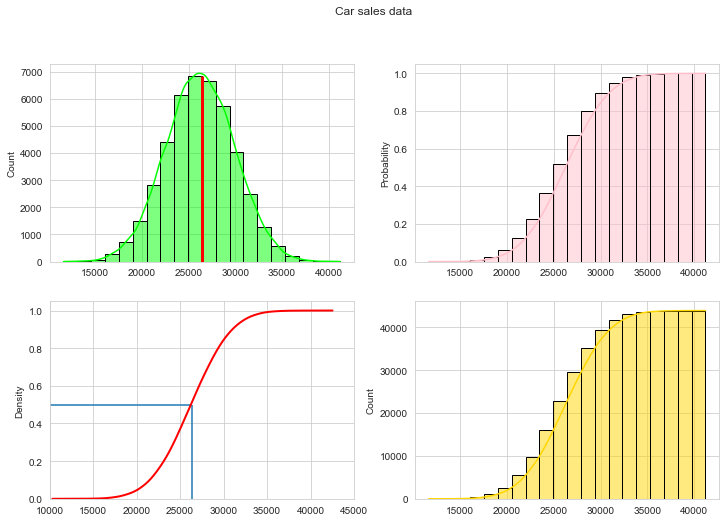

In [509]:
fig, ax = plt.subplots(2,2, figsize=(12,8))
plt.suptitle('Car sales data')

sns.histplot(car_data, ax=ax[0,0], color='lime', kde=True, edgecolor='black', linewidth=1, fill=True, bins=20)
ax[0,0].vlines(car_fc_max, ymin=0, ymax=car_f_max, color="red", linewidth=3)

sns.histplot(car_data, ax=ax[0,1], color='pink', kde=True, cumulative=True,
             edgecolor='black', linewidth=1, fill=True, bins=20, stat='probability')


sns.kdeplot(car_data, ax=ax[1,0], color="red", linewidth=2, cumulative=True, 
            gridsize=1000)

ax[1,0].vlines(car_fc_max, ymin=0, ymax=0.5)
ax[1,0].hlines(0.5, xmin=0, xmax=car_fc_max)
ax[1,0].set_xlim(10000,45000)

sns.histplot(car_data, ax=ax[1,1], color='gold', kde=True, cumulative=True,
             edgecolor='black', linewidth=1, fill=True, bins=20, stat='count')



plt.show()

What is the p that a customer is going to spend $ X or less?

In [510]:
stats.norm.cdf(21500, loc=26230, scale=3675)

0.0990341037407323

In [511]:
stats.norm.cdf(26000, loc=26230, scale=3675)

0.4750484735899566

In [512]:
stats.norm.cdf(1, loc=26230, scale=3675)

4.764539910511627e-13

In [513]:
stats.norm.cdf(40000, loc=26230, scale=3675)

0.9999104971227971

What is the p that a customer is going to spend $ X or more?

In [514]:
stats.norm.sf(21500, loc=26230, scale=3675)

0.9009658962592677

In [515]:
stats.norm.sf(21500, loc=26230, scale=3675) + stats.norm.cdf(21500, loc=26230, scale=3675)

1.0

In [516]:
stats.norm.sf(26000, loc=26230, scale=3675)

0.5249515264100434

In [517]:
stats.norm.sf(1, loc=26230, scale=3675)

0.9999999999995235

In [518]:
stats.norm.sf(40000, loc=26230, scale=3675)

8.950287720287159e-05

What is the p that a customer is going to spend more than X Dollar or less or less than Y Dollar or less?

In [519]:
car_25 = stats.norm.cdf(25000, loc=26230, scale=3675)
car_45 = stats.norm.cdf(45000, loc=26230, scale=3675)

car_45_25 = car_45 - car_25
print(car_45_25)

0.6310718265787447


In [520]:
# In the ND with mean 0 and std 1
stats.norm.interval(car_45_25)

(-0.898482870456288, 0.898482870456288)

What is the p that a customer is going to spend X Dollar or less or more than Y Dollar or more?

In [521]:
car_30 = stats.norm.cdf(30000, loc=26230, scale=3675)
car_50 = stats.norm.sf(50000, loc=26230, scale=3675)

car_30_50 = car_30 + car_50
print(car_30_50)

0.8475189333382801


#### <b>Example - electric cars battery recharges</b>

<p>
Lately the car dealership included electric cars into their sales offers.<br>
The sales managers are preparing for customer questions, particular<br>
In which driving distance must the batteries recharged?
</p> 

<p>
As the driving distance depends on different factors like innercity traffic or not<br>
there is no easy answer, but fortunately there is a normal distribution model of the riving distance?
</p> 

In [522]:
mu, sigma = 500, 40
batteries = np.random.normal(mu, sigma, size=90000)

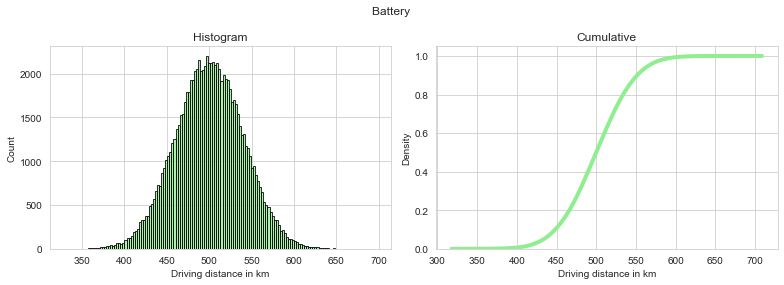

In [523]:
fig = plt.figure(figsize=(11,4), tight_layout=True)
plt.suptitle('Battery ')

ax1=fig.add_subplot(121)
sns.histplot(batteries, color='lightgreen', edgecolor='black', linewidth=0.8, ax=ax1)
ax1.set_title('Histogram')
ax1.set_xlabel("Driving distance in km")

ax2=fig.add_subplot(122)
sns.kdeplot(batteries, color='lightgreen', linewidth=4, ax=ax2, cumulative=True)
ax2.set_title("Cumulative")
ax2.set_xlabel("Driving distance in km")

plt.show()

In [524]:
batteries_df = pd.DataFrame(batteries, columns=['Driving distance km'])
batteries_df.head()

,Driving distance km
0,483.491066
1,463.120410
2,505.490642
3,478.543137
4,470.273639


In [525]:
batteries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Driving distance km  90000 non-null  float64
dtypes: float64(1)
memory usage: 703.2 KB


In [526]:
batteries_df.describe()

,Driving distance km
count,90000.000000
mean,499.950531
std,40.028929
min,330.118087
25%,473.009596
50%,499.963429
75%,527.055764
max,696.512234


What is the probability that battery will last 200 km or less?

In [527]:
mu, scale = 500, 40

battery_450 = stats.norm.cdf(450, mu, scale)
print(battery_450)

0.10564977366685535


What is the probability that the battery will last 500 or more km?

In [528]:
battery_500 = stats.norm.sf(500, mu, scale)
print(battery_500)

0.5


What is the probability that the battery will last between 400 and 700 km?

In [529]:
battery_700 = stats.norm.cdf(700, mu, scale)
battery_400 = stats.norm.cdf(400, mu, scale)

battery_700_400 = battery_700 - battery_400
print(battery_700_400 )

0.9937900480226519


What is the probability that the battery will last below 340 and more than 510 km?

In [530]:
battery_340 = stats.norm.cdf(340, mu, scale)
battery_510 = stats.norm.sf(510, mu, scale)

battery_340_510 = battery_340 + battery_510
print(battery_340_510)

0.4013253455589094


In [531]:
fweight_20_30 = np.random.normal(50, 8, 100000)

In [532]:
fweight_20_30_df = pd.DataFrame(fweight_20_30, columns=['fweight between 20 and 30'])
fweight_20_30_df.head()

,fweight between 20 and 30
0,42.990405
1,57.560767
2,58.886555
3,59.880240
4,30.921911


In [533]:
fweight_20_30_df.describe()

,fweight between 20 and 30
count,100000.000000
mean,50.000687
std,7.995322
min,16.940257
25%,44.582153
50%,49.993296
75%,55.389349
max,84.660652


<b>Determining the maximum counts of the histograms</b>

In [534]:
fweight_31_41 = np.random.normal(70, 8, 100000)

In [535]:
weight2_y, weight2_x  = np.histogram(fweight_31_41, bins=30)

print(len(weight2_x))
print(weight2_x)


31
[ 34.88419022  37.15399763  39.42380504  41.69361245  43.96341987
  46.23322728  48.50303469  50.7728421   53.04264952  55.31245693
  57.58226434  59.85207175  62.12187916  64.39168658  66.66149399
  68.9313014   71.20110881  73.47091623  75.74072364  78.01053105
  80.28033846  82.55014588  84.81995329  87.0897607   89.35956811
  91.62937553  93.89918294  96.16899035  98.43879776 100.70860517
 102.97841259]


In [536]:
print(len(weight2_y))
print(weight2_y)

30
[    1     5    23    42   108   199   459   895  1615  2630  4258  6016
  7999  9560 10831 11406 11027  9517  7939  5708  3997  2611  1528   867
   425   198    81    38    12     5]


In [537]:
weight2_max = np.max(weight2_y)
print(weight2_max)

11406


In [538]:
weight1_y, weight1_x = np.histogram(fweight_20_30, bins=30)
weight1_max = np.max(weight1_y)

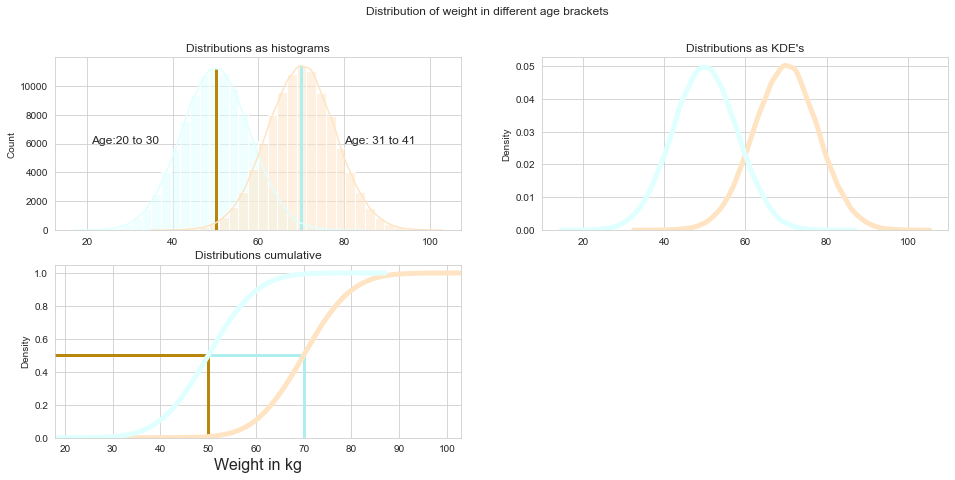

In [539]:
fig = plt.figure(figsize=(16,7))
plt.suptitle('Distribution of weight in different age brackets')

ax1=fig.add_subplot(2,2,1)
sns.histplot(fweight_20_30, ax=ax1, kde=True, color='lightcyan', thresh=0.9, bins=30)
sns.histplot(fweight_31_41, ax=ax1, kde=True, color='bisque', bins=30)

ax1.vlines(np.mean(fweight_31_41), 0, weight2_max,  color='paleturquoise', linewidth=3)
ax1.vlines(np.mean(fweight_20_30), 0, weight1_max,  color='darkgoldenrod', linewidth=3)

ax1.text(21, 6000, "Age:20 to 30", fontsize=12)
ax1.text(80, 6000, "Age: 31 to 41", fontsize=12)

ax1.set_title('Distributions as histograms')

ax2 = fig.add_subplot(2,2,2)
sns.kdeplot(fweight_31_41, ax=ax2, color='bisque', linewidth=5)
sns.kdeplot(fweight_20_30, ax=ax2,  color='lightcyan', linewidth=5)
ax2.set_title("Distributions as KDE's")

ax3 = fig.add_subplot(2,2,3)
sns.kdeplot(fweight_31_41, ax=ax3, color='bisque', linewidth=5, cumulative=True)
sns.kdeplot(fweight_20_30, ax=ax3,  color='lightcyan', linewidth=5, cumulative=True)

ax3.vlines(np.mean(fweight_31_41), 0, 0.5,  color='paleturquoise', linewidth=3)
ax3.vlines(np.mean(fweight_20_30), 0, 0.5,  color='darkgoldenrod', linewidth=3)

ax3.hlines(0.5, 0, np.mean(fweight_31_41),  color='paleturquoise', linewidth=3)
ax3.hlines(0.5, 0, np.mean(fweight_20_30),  color='darkgoldenrod', linewidth=3)
ax3.set_xlim(18, np.max(fweight_31_41))
ax3.set_title("Distributions cumulative")
ax3.set_xlabel("Weight in kg", fontsize=16)


plt.show()

What are the values of weight in both brackets one standard deviations from the mean?

In [540]:
stdev_1 = 0.3413*2
stdev_1

0.6826

In [541]:
stdev_1 = 0.3413*2
print(stdev_1)
weight_interval_1 = stats.norm.interval(stdev_1, loc=50, scale=8)
print(weight_interval_1)

0.6826
(42.001479251082046, 57.998520748917954)


In [542]:
weight_interval_2 = stats.norm.interval(stdev_1, loc=70, scale=8)
print(weight_interval_1)

(42.001479251082046, 57.998520748917954)


What are the weights with a probability of 0.01?

In [543]:
print(stats.norm.ppf(0.01, loc=50, scale=8))
print(stats.norm.ppf(0.01, loc=70, scale=8))

31.389217007673274
51.389217007673274


What are the weights with a probability of X = 31.389 or lower?

In [544]:
stats.norm.cdf(stats.norm.ppf(0.01, loc=50, scale=8), loc=50, scale=8)

0.01

In [545]:
stats.norm.cdf(stats.norm.ppf(0.01, loc=70, scale=8), loc=70, scale=8)

0.01

What are the greatest weights with a probability of 0.01 (concerning the right end tail)?

In [546]:
print(stats.norm.ppf(1-0.01, loc=50, scale=8))
print(stats.norm.ppf(1-0.01, loc=70, scale=8))
# Only 0.01 percent of weights are greater than these.

68.61078299232673
88.61078299232673


What are the probabilities for both brackets of a weight greater than 70 kg

In [547]:
print(stats.norm.sf(70, loc=50, scale=8))
print(stats.norm.sf(70, loc=70, scale=8))

0.006209665325776132
0.5


What are the probabilities for both brackets of a weight lower than X kg?

In [548]:
print(stats.norm.cdf(70, loc=50, scale=8))
print(stats.norm.cdf(70, loc=70, scale=8))

0.9937903346742238
0.5


In [549]:
print(stats.norm.cdf(55.67, loc=50, scale=8))
print(stats.norm.cdf(55.67, loc=70, scale=8))

0.7607601846175149
0.03662659291129671


In [550]:
1/5

0.2

### <b>Poisson distribution</b>

<p>
models the frequency of an event (or success = k) occuring in a fixed interval of time.
</p> 

<p>
<img src="possion_dist.png" alt="Poisson" height="300" width="300"> 
</p> 

<p>
<b>Example:</b><br>
Assume the mean number of patients arriving in an emergency room of a hospital is 5.5.<br>
What then is the p of 4 patients arriving?
</p> 

In [551]:
stats.poisson.pmf(k=4, mu=5.5)

0.1558188037253969

In [552]:
stats.poisson.pmf(k=7, mu=5.5)

0.12344930223720431

In [553]:
stats.poisson.pmf(k=1, mu=5.5)

0.02247724291155237

In [554]:
er = stats.poisson.rvs(mu=5.5, size=99000)
print(len(er))
print(er[:10])

99000
[ 3  4  5  6  4  5  2  8  8 10]


In [555]:
er_df = pd.DataFrame(er, columns=['n-arrivals at ER'])
er_df.head()

,n-arrivals at ER
0,3
1,4
2,5
3,6
4,4


In [556]:
er_df.describe()

,n-arrivals at ER
count,99000.000000
mean,5.512162
std,2.348950
min,0.000000
25%,4.000000
50%,5.000000
75%,7.000000
max,20.000000


In [557]:
er_df.value_counts()

n-arrivals at ER
5                   16956
6                   15533
4                   15156
7                   12324
3                   11349
8                    8369
2                    6078
9                    5258
10                   2886
1                    2226
11                   1394
12                    649
0                     369
13                    283
14                    111
15                     40
16                     12
17                      4
18                      2
20                      1
dtype: int64

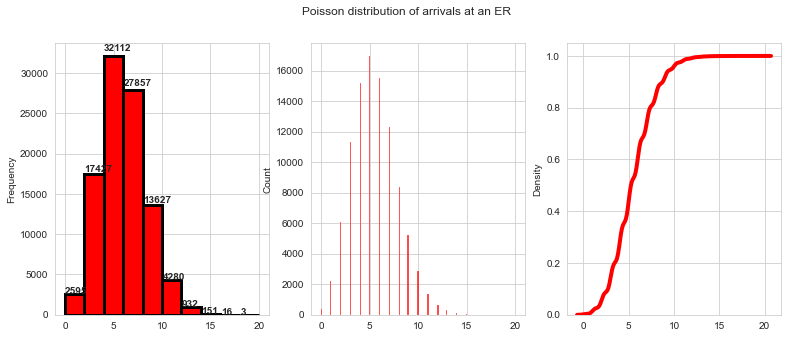

In [558]:
fig = plt.figure(figsize=(13,5))
plt.suptitle('Poisson distribution of arrivals at an ER')

ax1 = fig.add_subplot(1,3,1)
er_df.plot(kind='hist', ax=ax1, edgecolor='black', linewidth=3, legend=False, color=['red'],
           bins=10)

for i in ax1.patches:
    # print(i.get_height())
    ax1.annotate(str(int(i.get_height())),
                (i.get_x()*1.005, i.get_height()*1.02),
                 fontweight='bold')

ax2 = fig.add_subplot(1,3,2)
sns.histplot(er, kde=False, ax=ax2, color='red')

ax3 = fig.add_subplot(1,3,3)
sns.kdeplot(er, cumulative=True, ax=ax3, color='r', linewidth=4)


plt.show()

<b>Frequency table</b>

In [559]:
stats.relfreq(er, numbins=10)

RelfreqResult(frequency=array([2.62121212e-02, 1.76030303e-01, 3.24363636e-01, 2.81383838e-01,
       1.37646465e-01, 4.97878788e-02, 3.97979798e-03, 5.25252525e-04,
       6.06060606e-05, 1.01010101e-05]), lowerlimit=-1.1111111111111112, binsize=2.2222222222222223, extrapoints=0)

In [560]:
er_y_frequencies, er_x_classes = np.histogram(er, bins=10)

er_x_classes = np.delete(er_x_classes, 0)

print(len(er_y_frequencies))
print(len(er_x_classes))

10
10


In [561]:
er_frequTable = pd.DataFrame(list(zip(er_x_classes, er_y_frequencies)),  
                columns=['Frequency classes', 'Frequency'],
                index=list(range(1,11)))

er_frequTable['Proportions'] = er_frequTable.iloc[:,1] / er_frequTable.iloc[:,1].sum()

er_frequTable

,Frequency classes,Frequency,Proportions
1,2.0,2595,0.026212
2,4.0,17427,0.176030
3,6.0,32112,0.324364
4,8.0,27857,0.281384
5,10.0,13627,0.137646
6,12.0,4280,0.043232
7,14.0,932,0.009414
8,16.0,151,0.001525
9,18.0,16,0.000162
10,20.0,3,0.000030


2.62121212e-02 = 0.026212

In [562]:
er_frequTable[er_frequTable.iloc[:, 1] == er_frequTable.iloc[:, 1].max()]

,Frequency classes,Frequency,Proportions
3,6.0,32112,0.324364


In [563]:
er_frequTable[er_frequTable.iloc[:, 1] == er_frequTable.iloc[:, 1].min()]

,Frequency classes,Frequency,Proportions
10,20.0,3,0.00003


What is the probability of X or less patients arriving?

In [564]:
stats.poisson.cdf(k=5, mu=5.5)

0.5289186865258626

In [565]:
stats.poisson.cdf(k=2, mu=5.5)

0.08837643235678545

In [566]:
stats.poisson.cdf(k=15, mu=5.5)

0.9997998321152127

What is the probability of X or more patients arriving?<br>
Survival function: sf

In [567]:
stats.poisson.sf(k=5, mu=5.5)

0.47108131347413745

In [568]:
stats.poisson.cdf(k=5, mu=5.5) + stats.poisson.sf(k=5, mu=5.5)

1.0

In [569]:
stats.poisson.sf(k=2, mu=5.5)

0.9116235676432145

In [570]:
stats.poisson.sf(k=15, mu=5.5)

0.0002001678847872416

#### <b>Example: Virus intrusion</b>

<p>
A virus intrudes into a cell on average 0.5 times per minute.
</p> 

In [571]:
virus = stats.poisson.rvs(mu=0.5, size=30000)
print(np.shape(virus))

(30000,)


In [572]:
virus_df = pd.DataFrame(virus, columns=['Virus intrusions'])
virus_df.head()

,Virus intrusions
0,3
1,1
2,0
3,0
4,0


In [573]:
virus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Virus intrusions  30000 non-null  int32
dtypes: int32(1)
memory usage: 117.3 KB


In [574]:
virus_df.describe()

,Virus intrusions
count,30000.000000
mean,0.504000
std,0.711665
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,5.000000


The smaller mu the more the distribution appears in the typical form of poisson distribution.

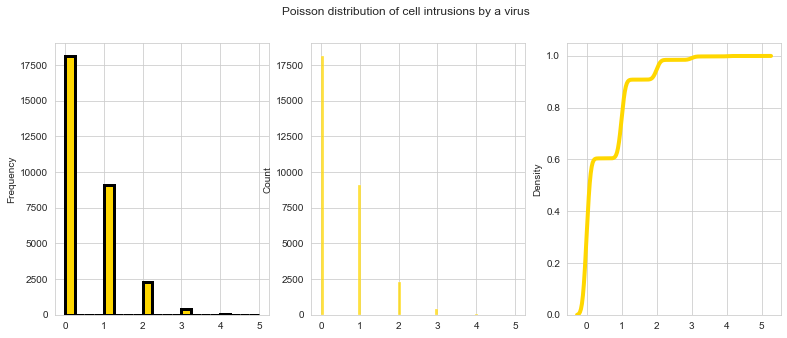

In [575]:
fig = plt.figure(figsize=(13,5))
plt.suptitle('Poisson distribution of cell intrusions by a virus')

ax1 = fig.add_subplot(1,3,1)
virus_df.plot(kind='hist', ax=ax1, edgecolor='black', linewidth=3, legend=False, color=['gold'], bins=20)

ax2 = fig.add_subplot(1,3,2)
sns.histplot(virus, kde=False, ax=ax2, color='gold')

ax3 = fig.add_subplot(1,3,3)
sns.kdeplot(virus, cumulative=True, ax=ax3, color='gold', linewidth=4)


plt.show()

What is the p of X viruses intruding?

In [576]:
stats.poisson.pmf(2, mu=50)

2.410937309954894e-19

In [577]:
virus_p = {}

for i in list(range(0,6)):
    virus_p[i] = round(stats.poisson.pmf(i, mu=0.5),4)
    
print(virus_p)

{0: 0.6065, 1: 0.3033, 2: 0.0758, 3: 0.0126, 4: 0.0016, 5: 0.0002}


In [578]:
virus_p_df = \
pd.DataFrame(virus_p.values(), index=virus_p.keys(), columns=['P'])

virus_p_df

,P
0,0.6065
1,0.3033
2,0.0758
3,0.0126
4,0.0016
5,0.0002


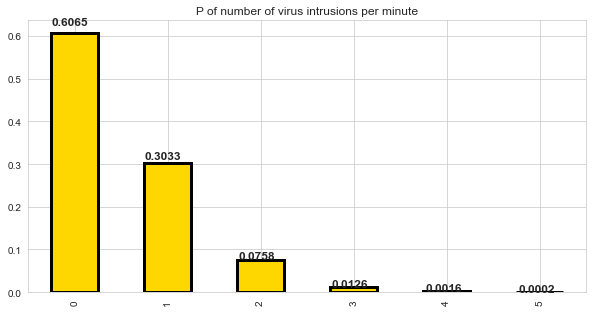

In [579]:
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111)
virus_p_df.plot(kind='bar', legend=False, edgecolor='black', linewidth=3,
                color='gold', title='P of number of virus intrusions per minute',
                ax=ax)



for p in ax.patches:
    # matplotlib.pyplot.annotate(text, xy, *args, **kwargs)
    # The point (x, y) to annotate.

    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.03),
                fontsize=12, fontweight="bold")

plt.show()

What is the probability of X or less viruses intruding?

In [580]:
viruses_p_cdf = dict()

for i in list(range(0,6)):
    viruses_p_cdf[i] = round(stats.poisson.cdf(i, mu=0.5), 4)
    
print(viruses_p_cdf)

{0: 0.6065, 1: 0.9098, 2: 0.9856, 3: 0.9982, 4: 0.9998, 5: 1.0}


In [581]:
viruses_p_cdf.keys()

dict_keys([0, 1, 2, 3, 4, 5])

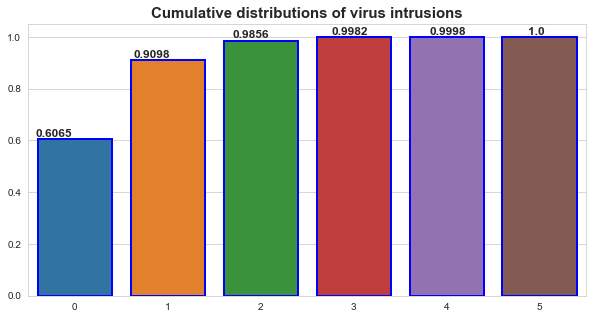

In [582]:
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111)
sns.barplot(x=list(viruses_p_cdf.keys()), y=list(viruses_p_cdf.values()), ax=ax,
            edgecolor='b', linewidth=2)
ax.set_title('Cumulative distributions of virus intrusions',
             fontweight='bold', fontsize=15)


for p in ax.patches:
    # matplotlib.pyplot.annotate(text, xy, *args, **kwargs)
    # The point (x, y) to annotate.

    ax.annotate(str(p.get_height()), (p.get_x() * 1.06, p.get_height() * 1.01),
                fontsize=12, fontweight="bold")

plt.show()

Finally the survival function.

In [583]:
viruses_sf = {}

for i in list(range(0,6)):
    viruses_sf[i] = round(stats.poisson.sf(i, mu=0.5), 4)

print(viruses_sf)

{0: 0.3935, 1: 0.0902, 2: 0.0144, 3: 0.0018, 4: 0.0002, 5: 0.0}


### <b>Geometric distribution</b>


In probability theory and statistics, the geometric distribution is either one of two discrete probability distributions:

<ul>
<li>The probability distribution of the number X of Bernoulli trials needed to get one success, supported on the set { 1, 2, 3, ... }</li>
<li>The probability distribution of the number Y = X − 1 of failures before the first success, supported on the set { 0, 1, 2, 3, ... }</li>
</ul> 

<a href="https://en.wikipedia.org/wiki/Geometric_distribution" target="_blank">Wikipedia</a> 
    

<p>
<b>Example:</b><br>
A easy example of the success case is a game of football (or many other sports).<br>
A striker has an average probability of p of kicking a goal.<br>
What is the p of a goal (k) in the n-kick towards the gate?
</p> 

In [584]:
for i in np.arange(1,11,1):
    print("Kick {i}: {p}".format(i=i, p=round(stats.geom.pmf(k=i, p=0.08),4)))

Kick 1: 0.08
Kick 2: 0.0736
Kick 3: 0.0677
Kick 4: 0.0623
Kick 5: 0.0573
Kick 6: 0.0527
Kick 7: 0.0485
Kick 8: 0.0446
Kick 9: 0.0411
Kick 10: 0.0378


The p of kicking a goal on the fourth kick is X

<p>
<b>Example:</b><br>
A manufacturer of relais for hydroelectric power stations is asking
how many functioning relais are produced before one corrupt relais are produced.<br>
This is a classical problem for a geometric distribution model.
</p> 

In [585]:
relays = {}

for i in np.arange(0.1, 1.1, 0.1):
    relays[i] = stats.geom.rvs(p=i, size=10000, random_state=77) 

print(relays.keys())
print(len(relays.keys()))
print(relays[0.1][:10])

dict_keys([0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9, 1.0])
10
[24 10 14  2  1 15  4  8  3  8]


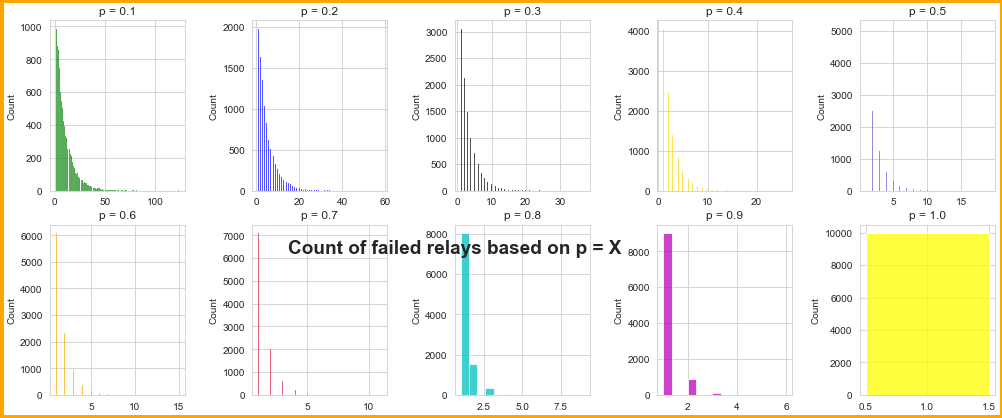

In [586]:
# figsize = Figure dimension (width, height) in inches.
fig = plt.figure(figsize=(15,2), edgecolor='orange', linewidth=7,
                 tight_layout=False)

plt.subplots_adjust(bottom=0, right=1, top=2.6, wspace=0.5)
plt.suptitle('Count of failed relays based on p = X', verticalalignment='baseline',
              fontsize=19, fontweight='bold')

relais_colors = ['r', 'g', 'b', 'black', 'gold', 'slateblue', 'orange', 'crimson' , 'c' , 'm', 'yellow']


for i,m in zip(np.arange(0.1, 1.1, 0.1), range(1,11)):
    
    ax = fig.add_subplot(2,5,m)
    sns.histplot(relays[i], ax=ax, color = relais_colors[m])
    ax.set_title("p = {}".format(str(round(i, 4))))
    
plt.show()

In [587]:
relays_p = [round(i,4) for i in list(np.arange(0.1, 1.1, 0.1))]
print(relays_p)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


In [588]:
relays_pmf_1 = dict()

for i in relays_p:
    relays_pmf_1[i] = round(stats.geom.pmf(5, i),4)

In [589]:
relays_pmf_1

{0.1: 0.0656,
 0.2: 0.0819,
 0.3: 0.072,
 0.4: 0.0518,
 0.5: 0.0312,
 0.6: 0.0154,
 0.7: 0.0057,
 0.8: 0.0013,
 0.9: 0.0001,
 1.0: 0.0}

In [590]:
relays_cdf_1 = list()

[relays_cdf_1.append(round(stats.geom.cdf(k=5, p=i ),4)) for i in relays_p]
    
relays_cdf_1

[0.4095, 0.6723, 0.8319, 0.9222, 0.9688, 0.9898, 0.9976, 0.9997, 1.0, 1.0]

Same as dict comprehension.

In [591]:
relays_pmf_3 = dict()

for i in np.arange(1,11):
    relays_pmf_3[i] = round(stats.geom.pmf(i, 0.7),4)

In [592]:
relays_pmf_3 

{1: 0.7,
 2: 0.21,
 3: 0.063,
 4: 0.0189,
 5: 0.0057,
 6: 0.0017,
 7: 0.0005,
 8: 0.0002,
 9: 0.0,
 10: 0.0}

In [593]:
attempts = stats.geom.ppf(q=0.9, p=0.0333)
attempts

68.0

In [594]:
relays_ppf = dict()

for i in relays_p:
    relays_ppf[i] = stats.geom.ppf(q=i, p=0.0333)
    
relays_ppf 

{0.1: 4.0,
 0.2: 7.0,
 0.3: 11.0,
 0.4: 16.0,
 0.5: 21.0,
 0.6: 28.0,
 0.7: 36.0,
 0.8: 48.0,
 0.9: 68.0,
 1.0: inf}

In [595]:
relays_ppf_df = \
pd.DataFrame(list(zip(relays_ppf.keys(), relays_ppf.values())), columns=['p', 'ppf'])

relays_ppf_df

,p,ppf
0,0.1,4.0
1,0.2,7.0
2,0.3,11.0
3,0.4,16.0
4,0.5,21.0
5,0.6,28.0
6,0.7,36.0
7,0.8,48.0
8,0.9,68.0
9,1.0,inf


In [596]:
y=relays_ppf_df.iloc[:,0]
y

0    0.1
1    0.2
2    0.3
3    0.4
4    0.5
5    0.6
6    0.7
7    0.8
8    0.9
9    1.0
Name: p, dtype: float64

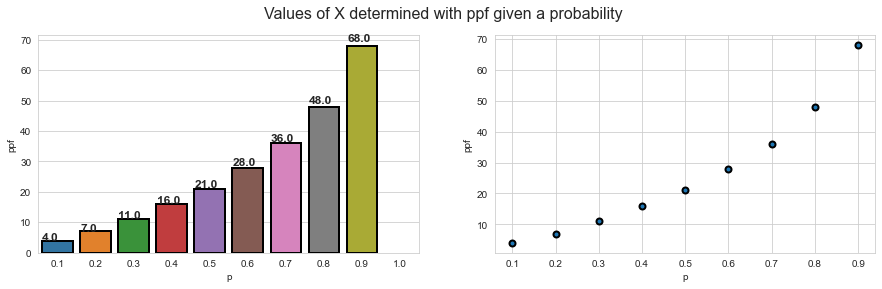

In [597]:
fig, (ax,ax1) = plt.subplots(1,2, figsize=(15,4))

plt.suptitle('Values of X determined with ppf given a probability',
             fontsize=16)

sns.barplot(x=relays_ppf_df.iloc[:,0] , y=relays_ppf_df.iloc[:,1],
                 edgecolor='black', linewidth=2, ax=ax)

for patch in ax.patches:
    ax.annotate(
               str(patch.get_height()),
               (patch.get_x()*1.002, patch.get_height()*1.02),
                fontsize=12, fontweight='bold'
               )



ax1 = sns.scatterplot(x=relays_ppf_df.iloc[:,0] , y=relays_ppf_df.iloc[:,1],
                 edgecolor='black', linewidth=2, ax=ax1)

plt.show()

<p>
<b>Example:</b><br>
A certain type of crystal can have 5 or 6 facets.<br>
Both subtypes are equally likely with p = 0.5.<br>
A mining CEO wants to model the output process of these two types of crystals.<br>
He decides to apply the binary model of the Binomial distribution.<br>
The geometric distribution is a special case of the Binomial distribution.<br>
The Bernoulli distribution is the binomial distribution with two (binary) outcomes.<br>
According to the <b>law of large numbers</b> the distribution of the <br>
sample means (sampling distribution) will approach the population mean.
</p> 



In [598]:
# Generate a sample of 250 newborn children
chrystals = stats.binom.rvs(n=1, p=0.505, size=250, random_state=42)

# Show the sample values
print(chrystals[:10])

[1 0 0 0 1 1 1 0 0 0]


In [599]:
chrystal_means = []

for i in range(2, 400):
    chrystal_means.append(stats.describe(chrystals[0:i]).mean)

print(len(chrystal_means))
print(chrystal_means[:5])

398
[0.5, 0.3333333333333333, 0.25, 0.4, 0.5]


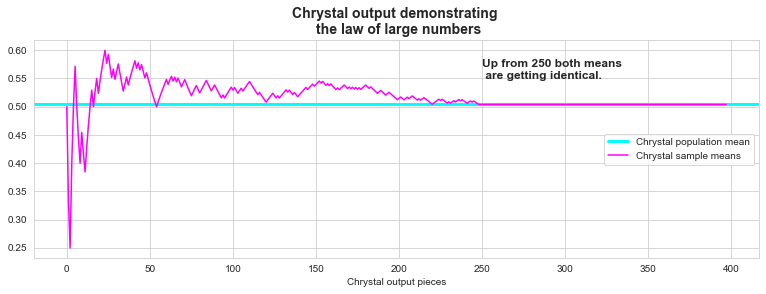

In [600]:
fig = plt.figure(figsize=(13,4))
fig.add_subplot(111)

plt.axhline(stats.binom.mean(n=1, p=0.505), color='cyan', linewidth=3)
plt.plot(chrystal_means, '-', color='magenta')
plt.legend(("Chrystal population mean","Chrystal sample means"), 
           loc='center right')
plt.title('Chrystal output demonstrating \n the law of large numbers', 
          fontsize=14, fontweight='bold')
plt.xlabel('Chrystal output pieces')
plt.annotate("Up from 250 both means \n are getting identical.", (250, 0.55), fontsize=12,
            fontweight='bold')

plt.show()

### <b>Central limit theorem (CLT)</b>

<p>
"In probability theory, the <b>central limit theorem (CLT)</b> establishes that, in many situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution (informally a bell curve) even if the original variables themselves are not normally distributed. The theorem is a key concept in probability theory because it implies that probabilistic and statistical methods that work for normal distributions can be applicable to many problems involving other types of distributions."<br>
<a href="https://en.wikipedia.org/wiki/Central_limit_theorem" target="_blank">Wikipedia</a> 
</p> 

<p>
If this holds true this should be true for a poisson distribution.
</p> 


In [601]:
poisson_445 = stats.poisson.rvs(mu=3, size=90000)
print(np.shape(poisson_445))

(90000,)


In [602]:
poisson_445_df = pd.DataFrame(poisson_445, columns=['Random poisson values'])
poisson_445_df.head()

,Random poisson values
0,6
1,3
2,3
3,3
4,3


In [603]:
poisson_445_df.describe()

,Random poisson values
count,90000.000000
mean,3.007778
std,1.744890
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,13.000000


In [604]:
poisson_445_vc = poisson_445_df.value_counts().sort_index()
poisson_445_vc 

Random poisson values
0                         4388
1                        13619
2                        20009
3                        20317
4                        14942
5                         8884
6                         4654
7                         2025
8                          786
9                          262
10                          85
11                          22
12                           4
13                           3
dtype: int64

Aggregates

In [605]:
stats.stats.describe(poisson_445)

DescribeResult(nobs=90000, minmax=(0, 13), mean=3.0077777777777777, variance=3.044640002172863, skewness=0.6036492237407881, kurtosis=0.37777631027704794)

In [606]:
poisson_445_repeats = stats.find_repeats(poisson_445)
poisson_445_repeats [:5]

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13.]),
 array([ 4388, 13619, 20009, 20317, 14942,  8884,  4654,  2025,   786,
          262,    85,    22,     4,     3], dtype=int64))

In [607]:
poisson_445_relfreq = stats.relfreq(poisson_445)
poisson_445_relfreq

RelfreqResult(frequency=array([4.87555556e-02, 3.73644444e-01, 2.25744444e-01, 2.64733333e-01,
       5.17111111e-02, 2.25000000e-02, 1.16444444e-02, 9.44444444e-04,
       2.88888889e-04, 3.33333333e-05]), lowerlimit=-0.7222222222222222, binsize=1.4444444444444442, extrapoints=0)

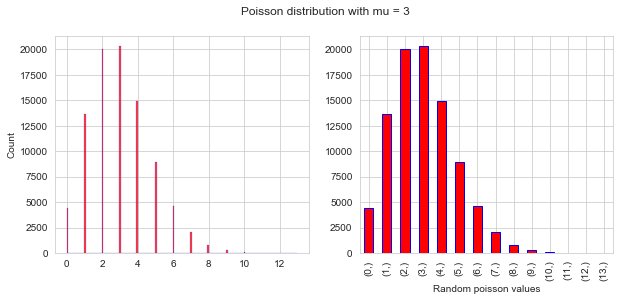

In [608]:
fig = plt.figure(figsize=(10,4))
plt.suptitle('Poisson distribution with mu = 3')

ax1 = fig.add_subplot(121)
sns.histplot(poisson_445, ax=ax1, color='r', edgecolor='b')

ax2 = fig.add_subplot(122)
poisson_445_vc.plot(kind='bar', color='r', edgecolor='b')

plt.show()


<p>
Now we want to demonstrate that the <b>central limit theorem (CLT)</b> establishes that, when independent random variables are added, their properly normalized sum tends toward a normal distribution. For this reason we
utilize the:
</p> 


#### Sampling distribution

<p>
"In statistics, a sampling distribution or finite-sample distribution is the probability distribution of a given random-sample-based statistic. If an arbitrarily large number of samples, each involving multiple observations (data points), were separately used in order to compute one value of a statistic (such as, for example, the sample mean or sample variance) for each sample, then the sampling distribution is the probability distribution of the values that the statistic takes on."<br>
<a href="https://en.wikipedia.org/wiki/Sampling_distribution" target="_blank">Wikipedia</a> 
</p>


In [609]:
sampling_means = []

# this takes a sample 10.000 times
for i in range(0,10000):
    # this takes a sample 11.000 from a data set of len 100.000
    sample = np.random.choice(poisson_445, size=11000, replace=True)
    mean = np.mean(sample)
    sampling_means.append(mean)
    
print(len(sampling_means))
print(sampling_means[:10])

10000
[3.0232727272727273, 3.0041818181818183, 2.986727272727273, 2.9796363636363634, 3.0057272727272726, 3.0236363636363635, 3.002727272727273, 2.9838181818181817, 2.9994545454545456, 2.981]


In [610]:
stats.describe(sampling_means)

DescribeResult(nobs=10000, minmax=(2.9484545454545454, 3.0687272727272727), mean=3.0075983818181817, variance=0.00027755592619724777, skewness=0.0013908328344891074, kurtosis=-0.05248914985607467)

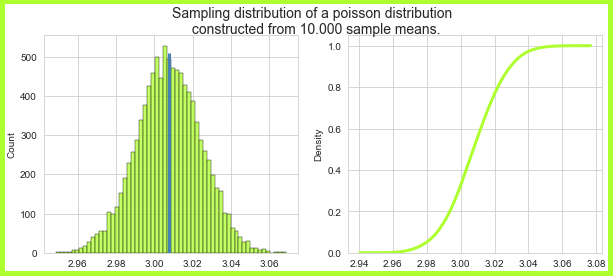

In [611]:
fig = plt.figure(figsize=(10,4), edgecolor='greenyellow', linewidth=10)
plt.suptitle("Sampling distribution of a poisson distribution \n constructed from 10.000 sample means.",
             fontsize=14)

ax1 = fig.add_subplot(121)
sns.histplot(sampling_means, edgecolor='black', ax=ax1, color='greenyellow')
ax1.vlines(stats.describe(sampling_means).mean, ymin=0, ymax=510, color='steelblue', linewidth=3)

ax2 = fig.add_subplot(122)
sns.kdeplot(sampling_means, cumulative=True, ax=ax2, color='greenyellow', linewidth=3)

plt.savefig("Sampling distribution of a poisson distribution")
plt.show()

This looks like the normal distribution, while the underlying random data is of the type Poisson.<br>
Given this sampling distribution we can assume that the true population mean is around 3.0064.<br>
This allows for inferences based on tests and the p-value within confidence intervals.